In [1]:

import h5py
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#from dedalus.extras import plot_tools
import os
import glob
import dedalus.public as d3
import string
import scipy
#import dask

In [2]:
base_dir = '/scratch/zb2113/DedalusData/2D/'
exp_name = 'MRBC_2D_RaM_1.0e+08*'
exp_list = sorted(glob.glob(exp_name,root_dir = base_dir))
for exp in exp_list:
    print(exp)
nexp = len(exp_list)

MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_1.4e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_2.8e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_4.2e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_5.6e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128
MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_7.0e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128


In [4]:

def get_param(file_name,param, default = np.real('NaN')):
    test = file_name.split('_')
    i = 0
    while i<len(test):
        if test[i] == param:
            break
        i+=1
    if i+1 < len(test):
        y = float(test[i+1])
    else:
        y = default
    return y



In [10]:
QR = np.zeros(len(exp_list))
RaM = np.zeros(len(exp_list))
for i,exp in enumerate(exp_list):
    QR[i] = get_param(exp,'QR')
    RaM[i] = get_param(exp,'Ra_M')
exp_list = [x for _,x in sorted(zip(QR,exp_list))]
# RaM = [x for _,x in sorted(zip(QR,RaM))]
QR.sort()
print(exp_list)
# print(RaM)
print(QR)

['MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_1.4e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_2.8e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_4.2e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_5.6e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128', 'MRBC_2D_RaM_1.0e+08_Pr_1.0e+00_QR_7.0e-03_DH_3.3e-01_Lx_6.4e+01_Nz_128']
[0.0014 0.0028 0.0042 0.0056 0.007 ]


In [7]:
ds = []
snap_id = np.arange(3,4,1)
for exp in (exp_list[:]):
    print(exp)
    file_list = []
    for i in snap_id:
        file_list.append(base_dir+exp+'/snapshots/snapshots_s'+str(i)+'.h5')
    
#    file_list = sorted(glob.glob(base_dir+exp+'/snapshots/snapshots_s?.h5')) \
#            + sorted(glob.glob(base_dir+exp+'/snapshots/snapshots_s??.h5'))
    dummy1 = xr.open_dataset(file_list[0],engine = 'dedalus')
    for file in file_list[1:]:
        dummy2 = xr.open_dataset(file,engine = 'dedalus')
        dummy1 = xr.concat([dummy1,dummy2],dim = 't')
    ds.append(dummy1)
dummy2 = []
del dummy1, dummy2

MRBC_2D_Ka_1.0e-06_Q0_1.0e+00_QR_2.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_2.6e+02_tp_1.0e+01_Nz_256


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/scratch/op13/dedalus/MRBC_ANA_TR/MRBC_2D_Ka_1.0e-06_Q0_1.0e+00_QR_2.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_2.6e+02_tp_1.0e+01_Nz_256/snapshots/snapshots_s3.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

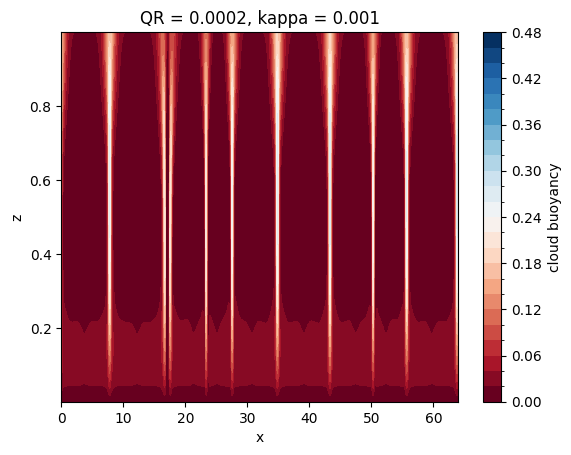

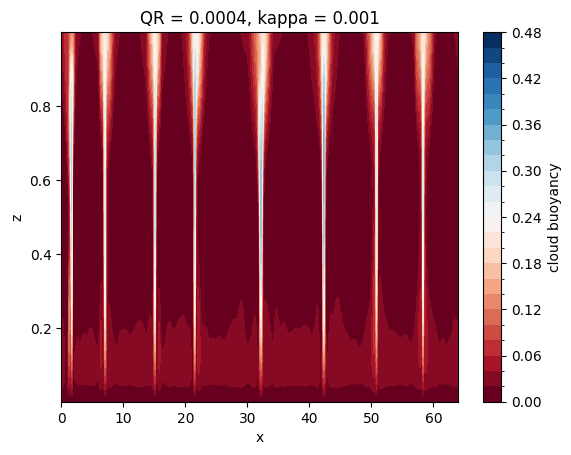

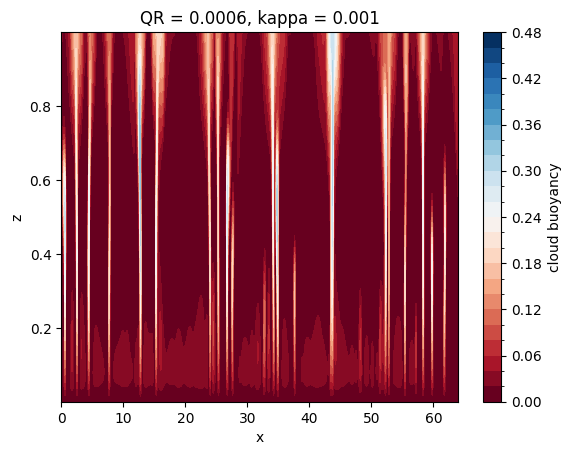

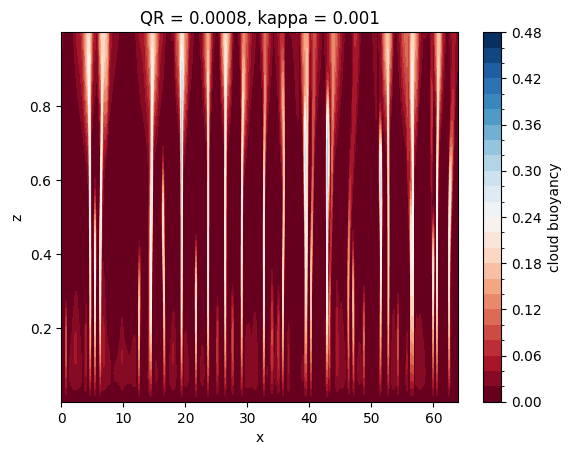

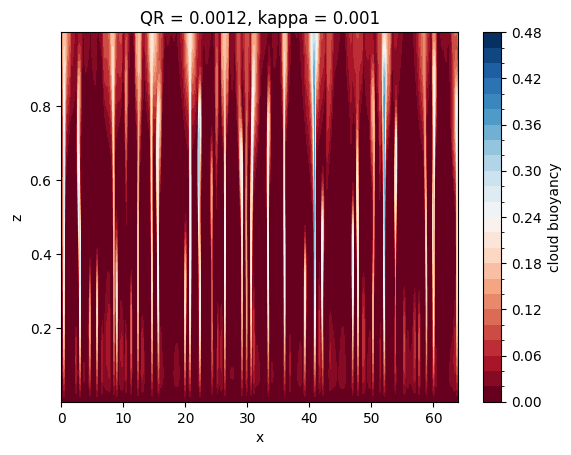

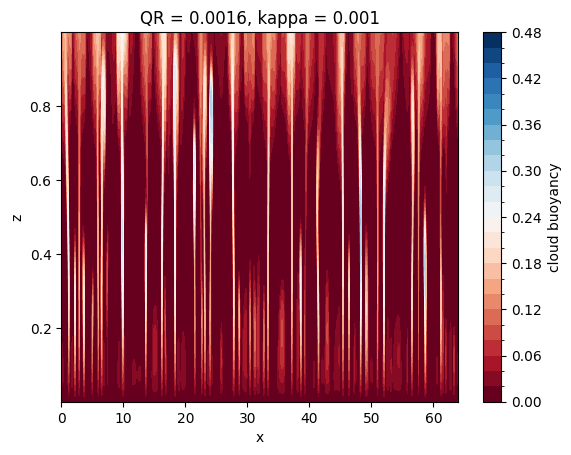

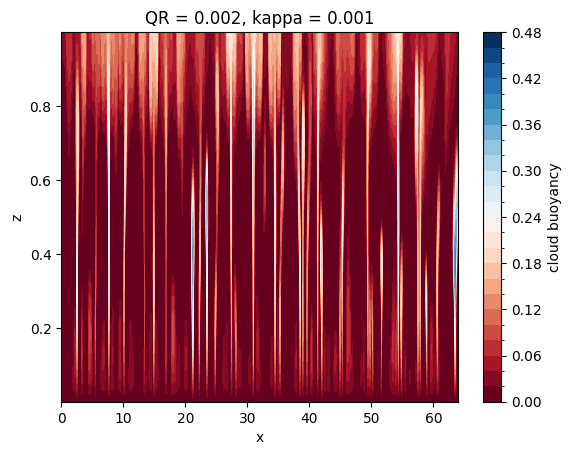

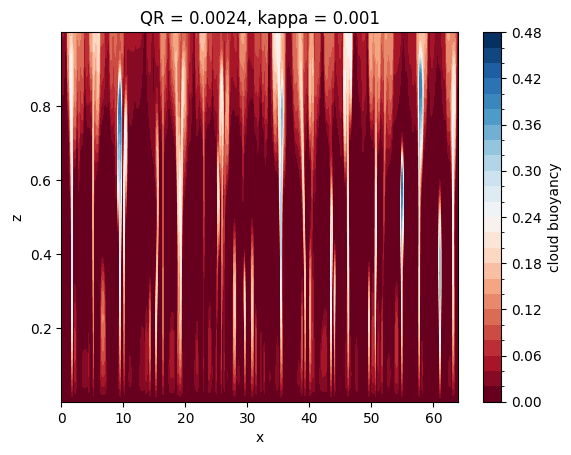

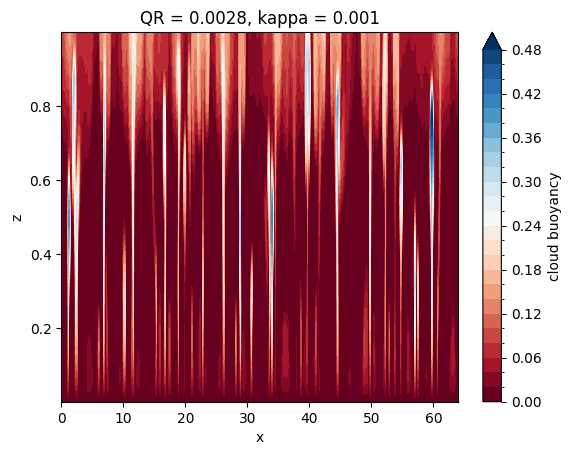

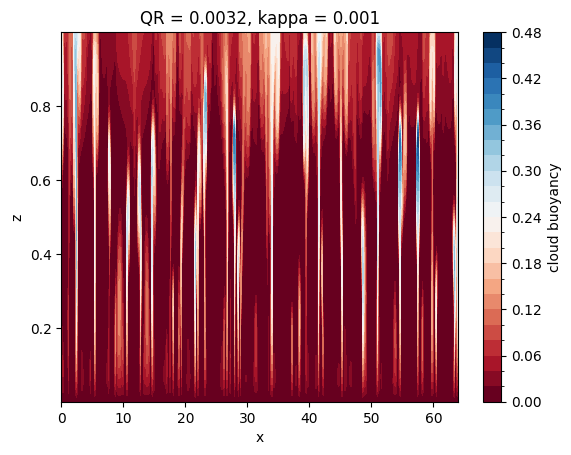

In [26]:
for i,data in enumerate(ds) :
    np.maximum((data['cloud buoyancy'])[-1,:,:],0).T.plot.contourf(levels = np.arange(0,0.5,0.02),cmap = 'RdBu')
    plt.title('QR = ' + str(QR[i]) + ', kappa = ' + str(kappa[i]))
    plt.show()

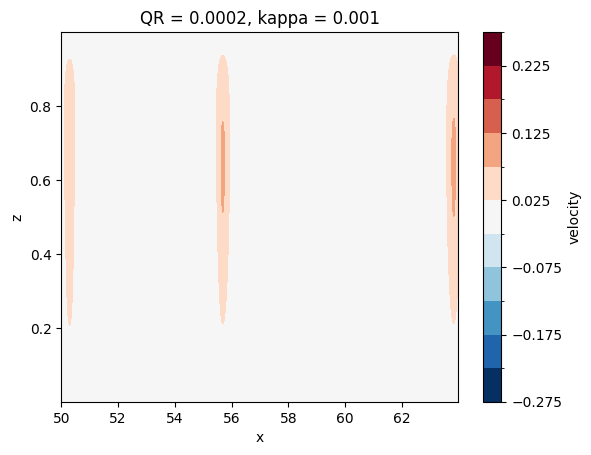

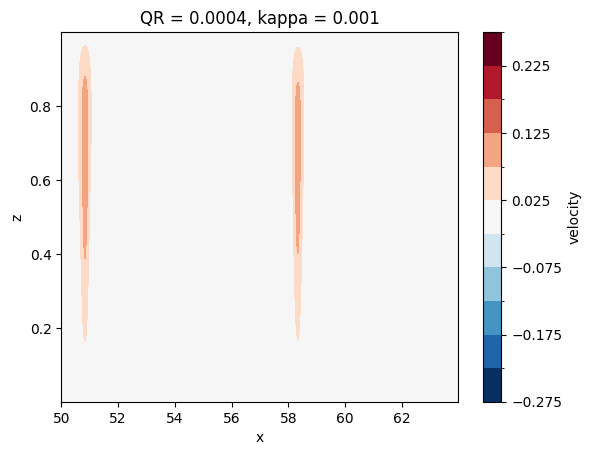

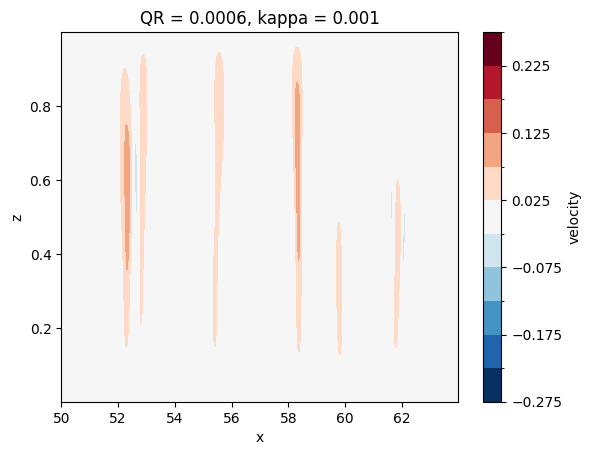

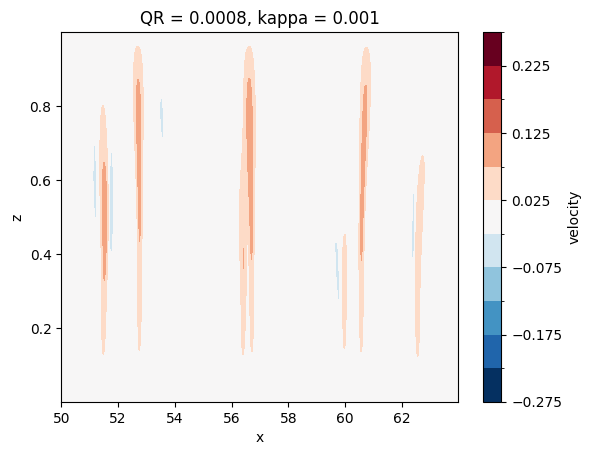

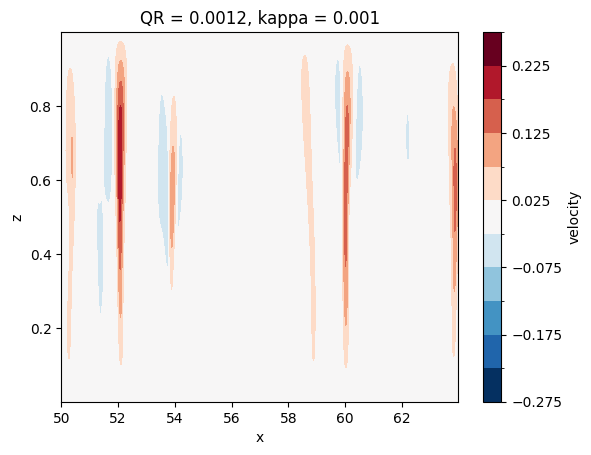

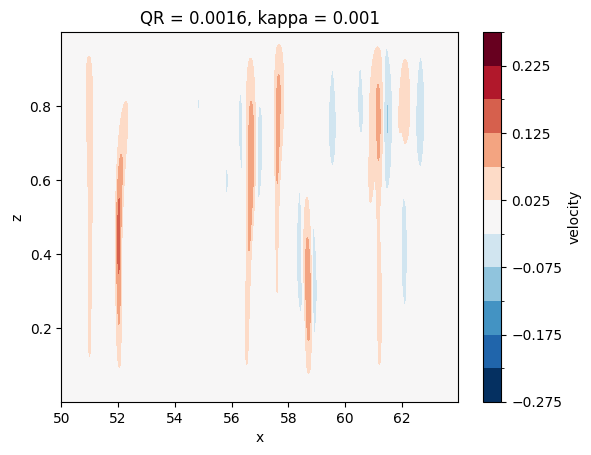

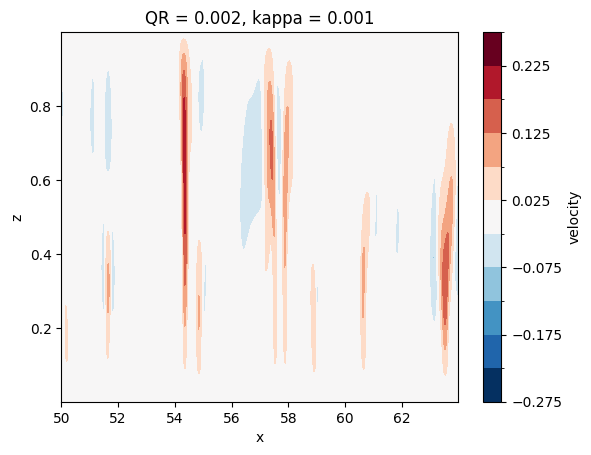

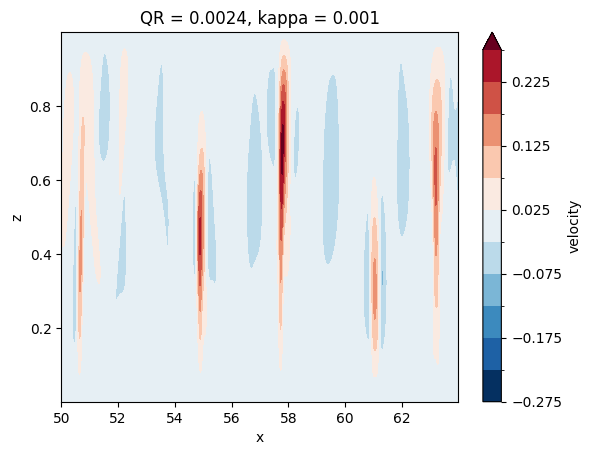

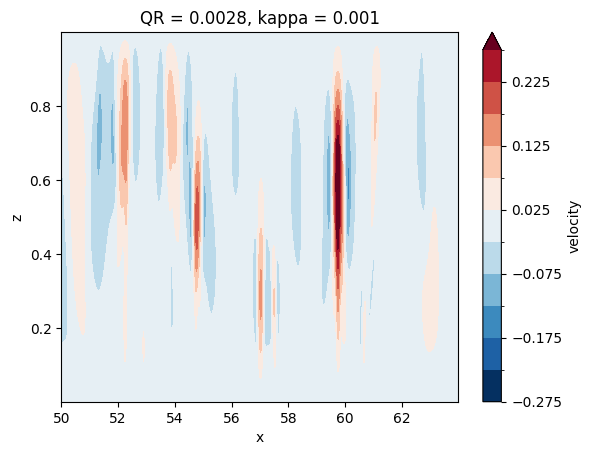

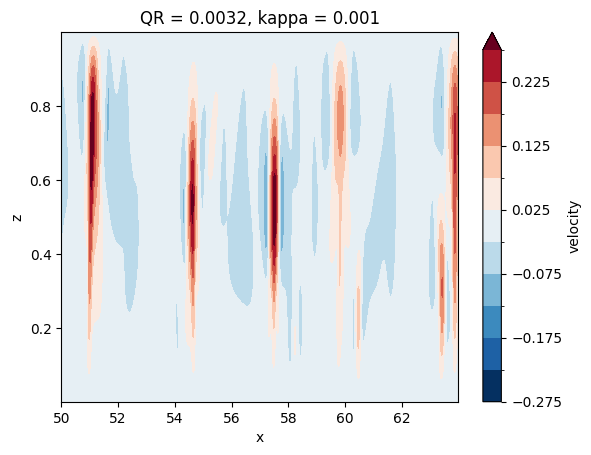

In [27]:
for i,data in enumerate(ds) :
    data['velocity'][-1,1,3200:4800,:].T.plot.contourf(levels = np.arange(-0.275,0.3,0.05),cmap = 'RdBu_r')
    plt.title('QR = ' + str(QR[i]) + ', kappa = ' + str(kappa[i]))
    plt.show()

In [36]:
ds2 = []
analysis_id = np.arange(6,11)
for exp in (exp_list[:]):
    print(exp)
    file_list = []
    for i in analysis_id:
        file_list.append(base_dir+exp+'/analysis/analysis_s'+str(i)+'.h5')
#    file_list = sorted(glob.glob(base_dir+exp+'/analysis/analysis_s?.h5')) \
#            + sorted(glob.glob(base_dir+exp+'/analysis/analysis_s??.h5'))
    dummy1 = xr.open_dataset(file_list[0],engine = 'dedalus')
    for file in file_list[1:]:
        dummy2 = xr.open_dataset(file,engine = 'dedalus')
        dummy1 = xr.concat([dummy1,dummy2],dim = 't')
    ds2.append(dummy1)
dummy2 = []
del dummy1, dummy2

MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_2.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_4.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_6.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_8.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_1.2e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_1.6e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_2.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_2.4e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_2.8e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64
MRBC_2D_Ka_1.0e-03_Q0_1.0e+00_QR_3.2e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01_Nz_64


In [37]:
ntime,dummy,nz = ds2[0]['zav clock tracer'].shape
ntime = 600
clock_av = np.zeros((nexp,ntime,nz))
D_av = np.zeros((nexp,ntime,nz))
M_av = np.zeros((nexp,ntime,nz))

for i,data in enumerate(ds2):
    clock_av[i,:,:] = data['zav clock tracer'][:ntime,0,:]
    D_av[i,:,:] = data['zav dry buoyancy'][:ntime,0,:]
    M_av[i,:,:] = data['zav moist buoyancy'][:ntime,0,:]

In [38]:
clock_av2 = clock_av

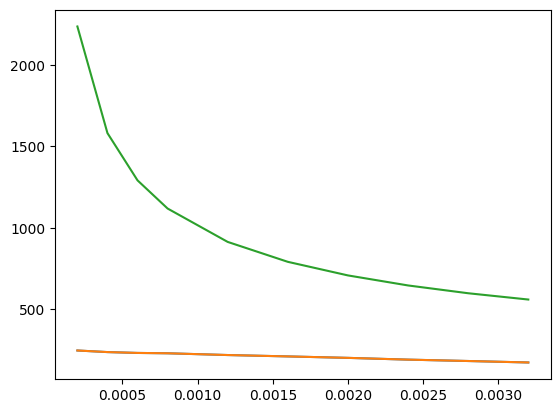

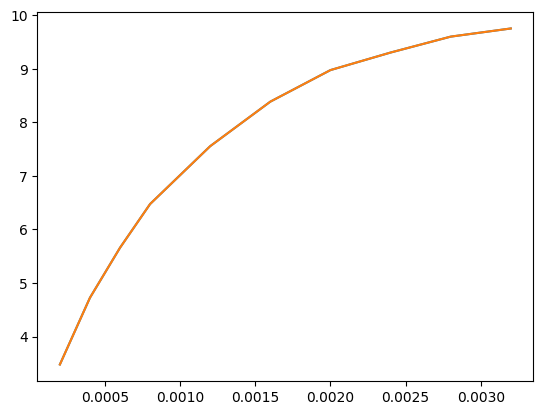

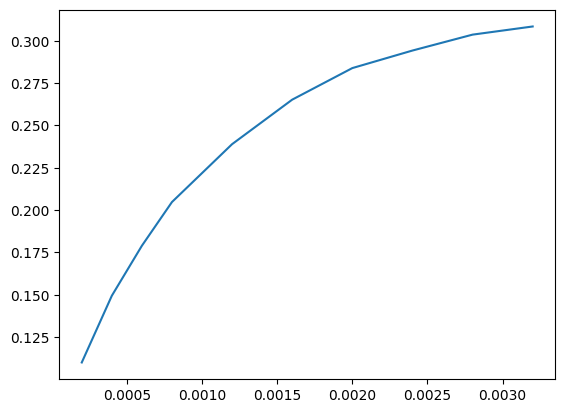

In [39]:
plt.plot(QR,np.mean(clock_av[:,:,-10:],(1,2)))
plt.plot(QR,np.mean(clock_av2[:,:,-10:],(1,2)))
plt.plot(QR, (kappa * QR) **(-0.5))

plt.show()
plt.plot(QR,np.mean(clock_av[:,:,-10:],(1,2))* QR**0.5)
plt.plot(QR,np.mean(clock_av2[:,:,-10:],(1,2))* QR**0.5)

plt.show()
plt.plot(QR,np.mean(clock_av[:,:,-10:],(1,2))* (QR * kappa) **.5)

plt.show()

#plt.plot(Q0,np.mean(clock_av[:,:,-10:],(1,2)) / np.mean(clock_av2[:,:,-5:],(1,2)))
#plt.show()

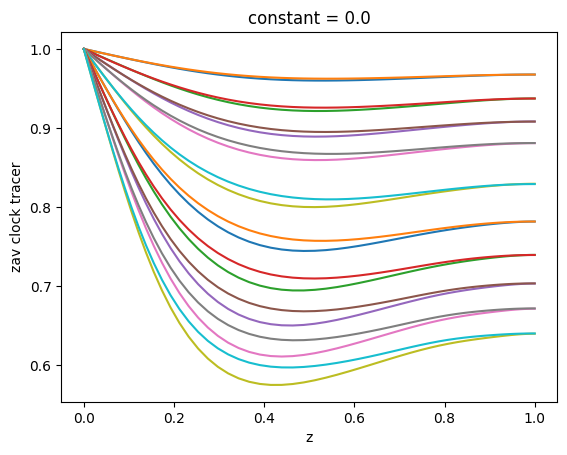

In [40]:
for i,data in enumerate(ds2):
    data['zav moist buoyancy'][:,0,:].mean('t').plot()
    scale = (1 - np.mean(M_av[i,:,-1],0))/ np.mean(clock_av[i,:,-1],0)
    (1 - scale * data['zav clock tracer'])[:,0,:].mean('t').plot()
    

In [41]:
def clock_diffusion(z,clock,alpha,kappa):
    dcdz = np.zeros_like(clock)
    dcdz[0] = clock[1]
    dcdz[1] = kappa**(-1) * (-1 -  0 *   alpha * clock[0] - alpha * z * clock[1])
    return dcdz

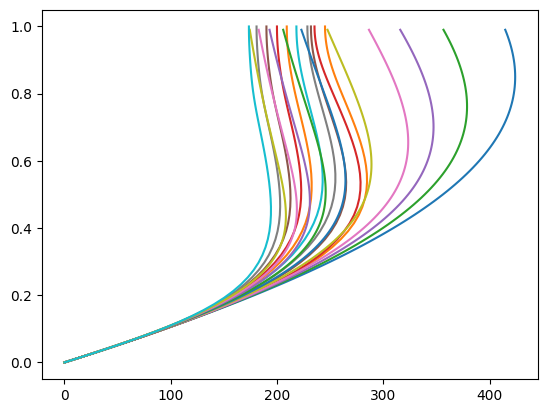

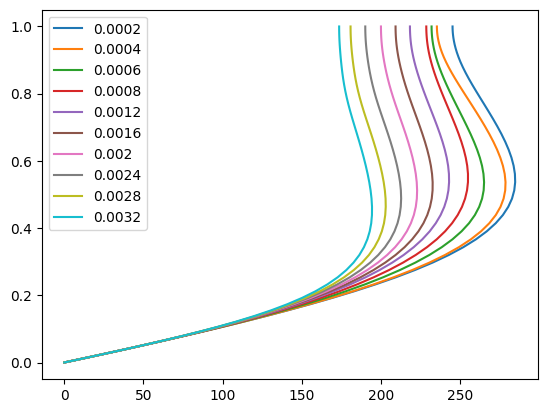

In [42]:
for i in range(0,nexp,1):
    alpha = QR[i] * 20 / np.pi
    ka = kappa[i]
    test = scipy.integrate.solve_ivp(clock_diffusion,(0,1),y0 = [0,1/ka], method='RK45', t_eval=np.arange(0,1,.01), args = (alpha, ka))
    plt.plot(test.y[0,:],test.t)
    plt.plot((ds2[i]['zav clock tracer'])[:,0,:].mean('t'),ds[i]['z'])

plt.show()
for i in range(nexp):
    plt.plot((ds2[i]['zav clock tracer'])[:,0,:].mean('t'),ds[i]['z'])
    plt.legend(QR)
plt.show()

In [90]:
test

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  9.800e-01  9.900e-01]
        y: [[ 0.000e+00  1.000e+01 ...  1.363e+03  1.387e+03]
            [ 1.000e+03  1.000e+03 ...  2.336e+03  2.373e+03]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0

IndexError: list index out of range

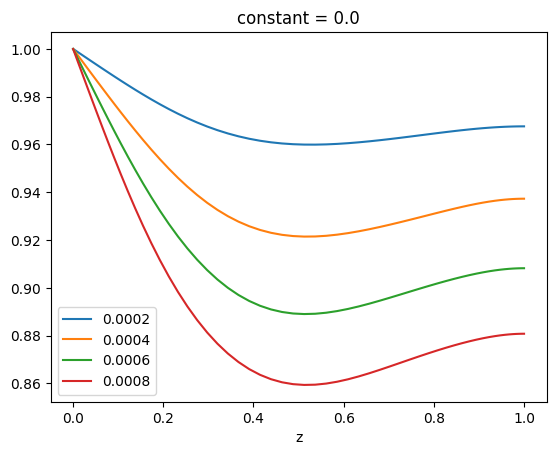

In [35]:
nexp = len(exp_list) 
for i in range(nexp):
    (ds2[i]['zav dry buoyancy']+ ds2[i]['zav total water'])[:,0,:].mean('t').plot()
    plt.legend(QR)
plt.show()
for i in range(nexp):
    (ds2[i]['zav total water'])[:,0,:].mean('t').plot()
plt.show()
for i in range(nexp):
    (ds2[i]['zav dry buoyancy'])[:,0,:].mean('t').plot()
plt.show()  
for i in range(nexp):
    (ds2[i]['zav cloud buoyancy'])[:,0,:].mean('t').plot()
plt.show()  
for i in range(nexp):
    (ds2[i]['zav clock tracer'])[:,0,:].mean('t').plot()
    plt.legend(QR)

plt.show()
for i in range(nexp):
    (ds2[i]['moist buoyancy flux'])[:,0,:].mean('t').plot()
plt.show() 
for i in range(nexp):
    (ds2[i]['dry buoyancy flux'])[:,0,:].mean('t').plot()
plt.show() 
for i in range(nexp):
    (ds2[i]['water flux'])[:,0,:].mean('t').plot()
plt.show() 
for i in range(nexp):
    (ds2[i]['buoyancy flux'])[:,0,:].mean('t').plot()
plt.show() 
for i in range(nexp):
    (ds2[i]['clock tracer flux'])[:,0,:].mean('t').plot()
plt.show() 

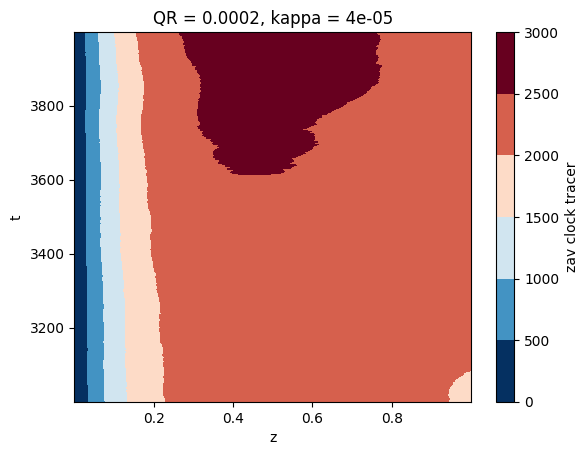

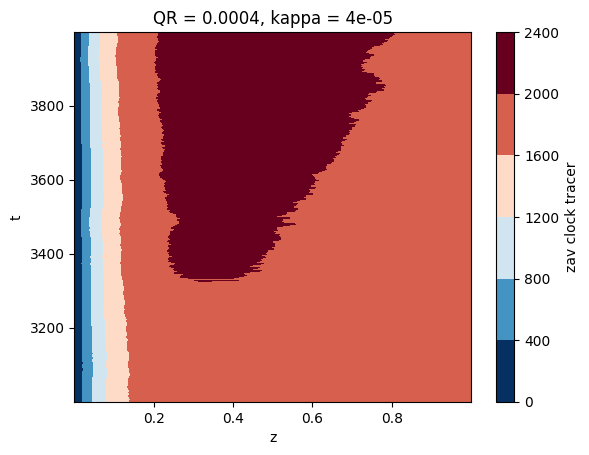

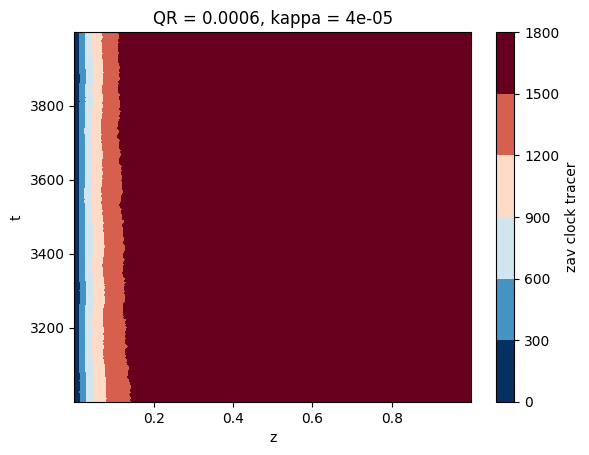

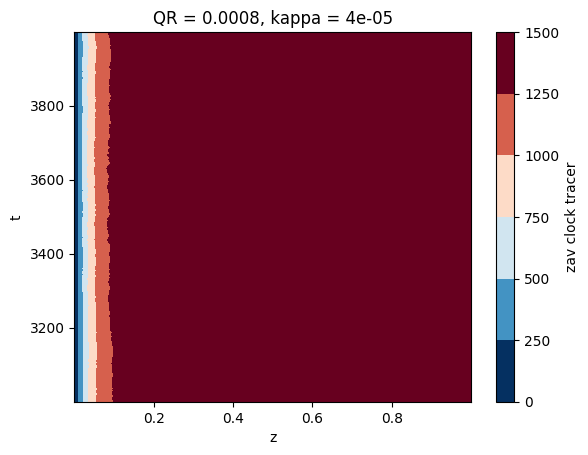

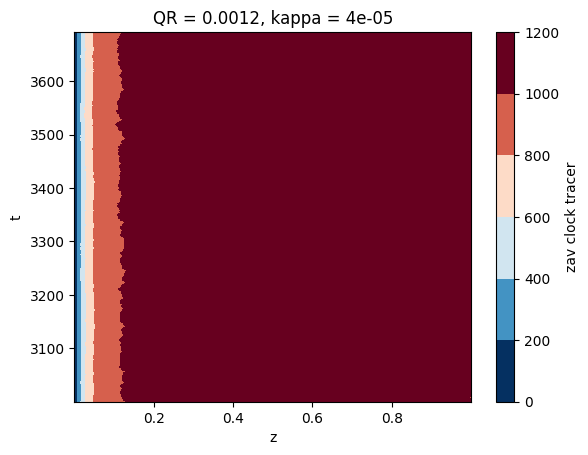

In [167]:
for i in range(nexp):
    (ds2[i]['zav clock tracer'])[:,0,:].plot.contourf(cmap = 'RdBu_r')
    plt.title('QR = ' + str(QR[i]) + ', kappa = ' + str(kappa[i]))
    plt.show()

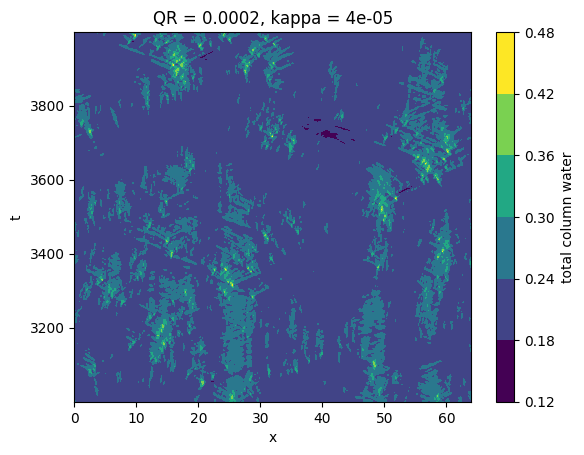

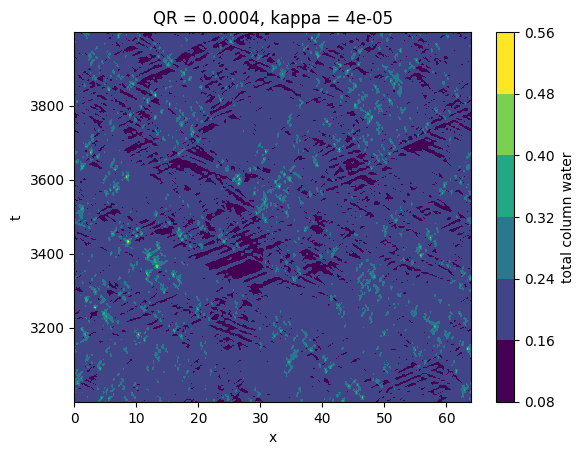

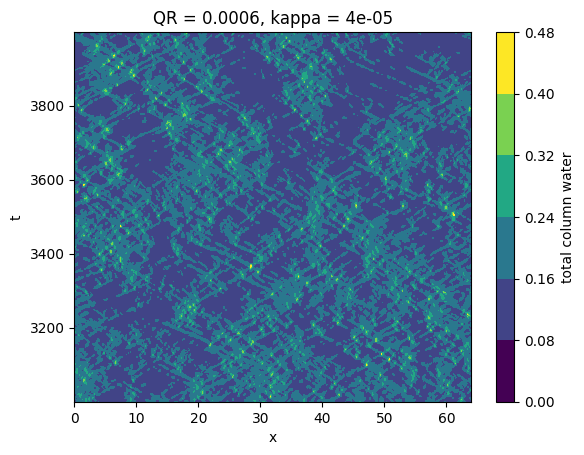

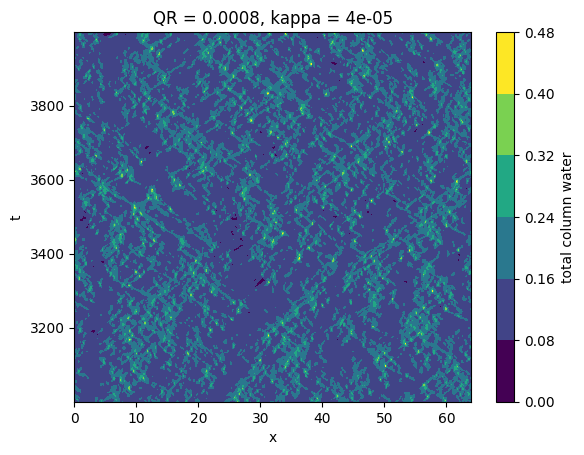

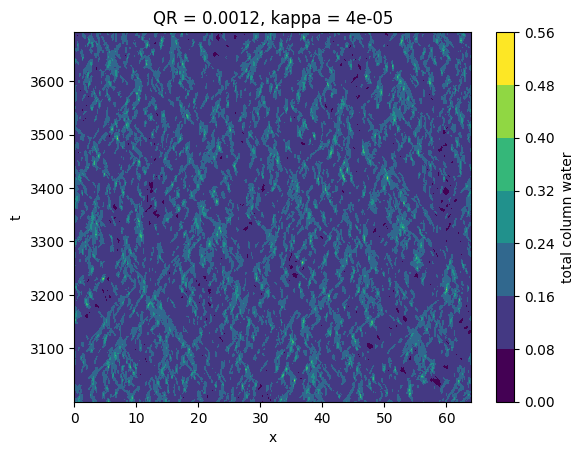

In [168]:
for i in range(nexp):
    (ds2[i]['total column water'])[:,:,0].plot.contourf()
    plt.title('QR = ' + str(QR[i]) + ', kappa = ' + str(kappa[i]))
    plt.show()

In [8]:
file = h5py.File(filename, mode='r')

AttributeError: 'File' object has no attribute 'dir'

In [25]:
list(file.attrs)

['handler_name', 'set_number', 'writes']

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_1.0e-02_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


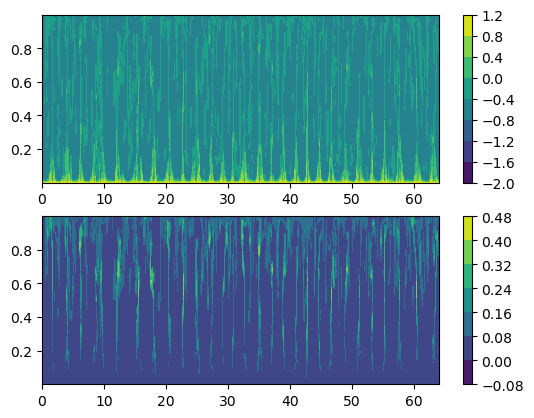

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_1.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


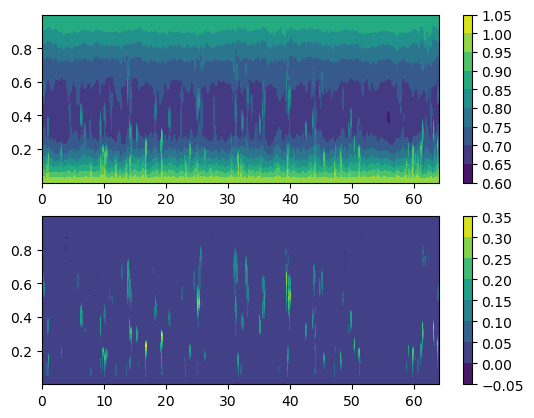

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_1.5e-02_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


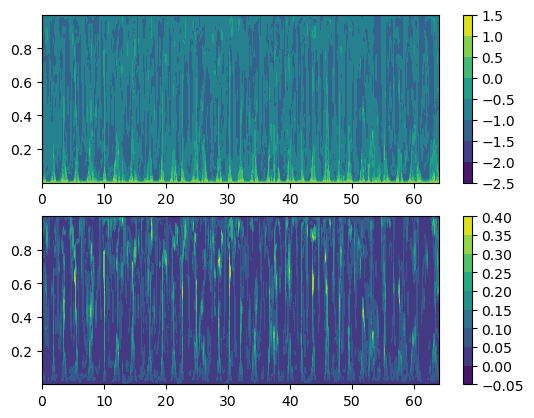

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_2.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


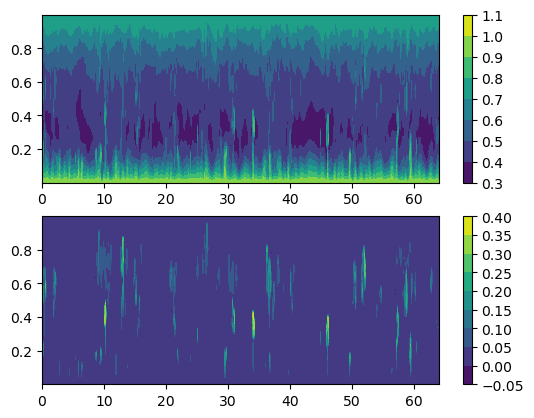

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_3.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


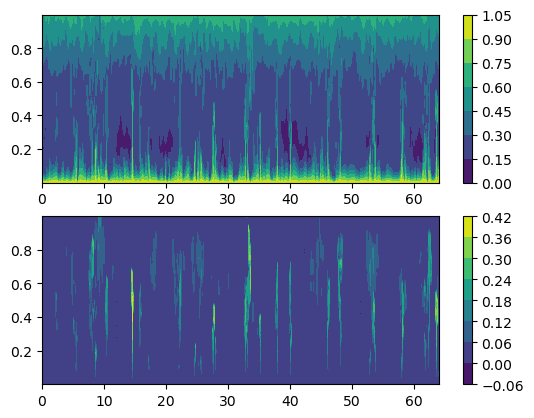

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_4.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


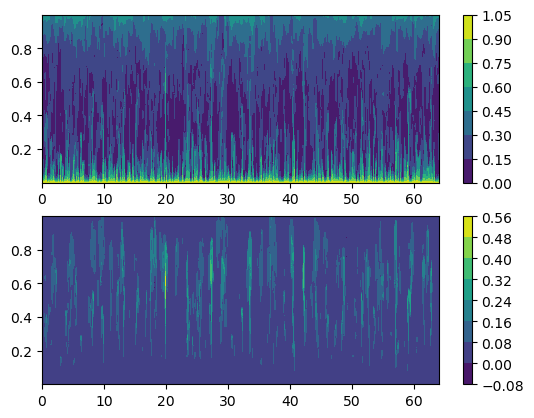

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_5.0e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


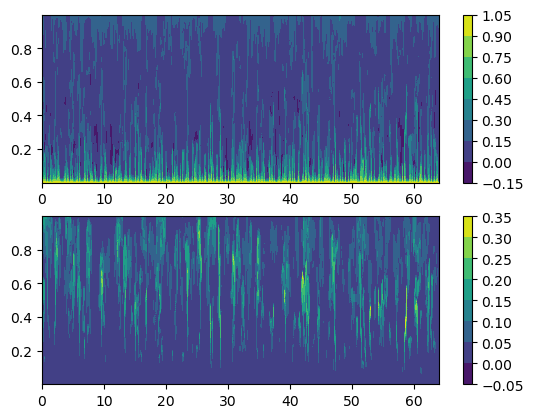

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_5.0e-04_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


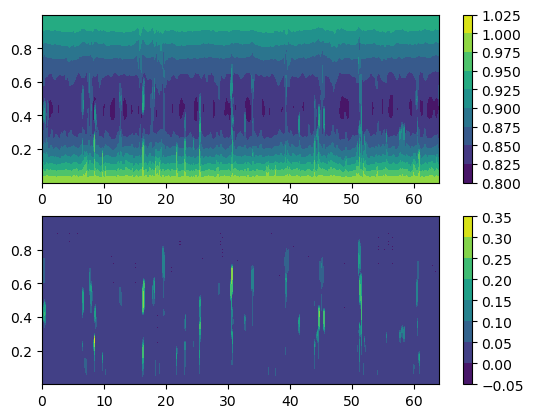

MRBC_2D_Ka_5.0e-05_Q0_1.0e+00_QR_7.5e-03_AL_3.0e+00_GM_1.0e+00_Lx_6.4e+01_tp_1.0e+01


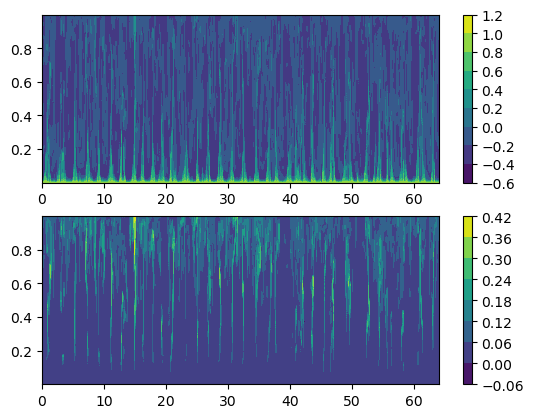

In [5]:
N2 = 1.0
for exp in exp_list:
    filename = base_dir + exp + '/snapshots/snapshots_s4.h5'
    file = h5py.File(filename, mode='r')
    M = file['tasks']['moist buoyancy'][:,:,:]
    D = file['tasks']['dry buoyancy'][:,:,:]
    CLD = file['tasks']['cloud buoyancy'][:,:,:]
    Z = file['tasks']['moist buoyancy'].dims[2]['z'][:]
    X = file['tasks']['moist buoyancy'].dims[1]['x'][:]

    #CLD = np.maximum(M - D + N2 * Z,0)
    #CLD = M - D + N2 * Z
    print(exp)
    plt.subplot(211)
    plt.contourf(X,Z,(M[-1,:,:]-0.0 *np.mean(M[-1,:,:],0,keepdims = True)).T)
    plt.colorbar()
    plt.subplot(212)
    plt.contourf(X,Z,CLD[-1,:,:].T)

    plt.colorbar()
    plt.show()
    file.close()





MRBC_2D_Ka_1.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_1.3e+02_tp_5.0e+00


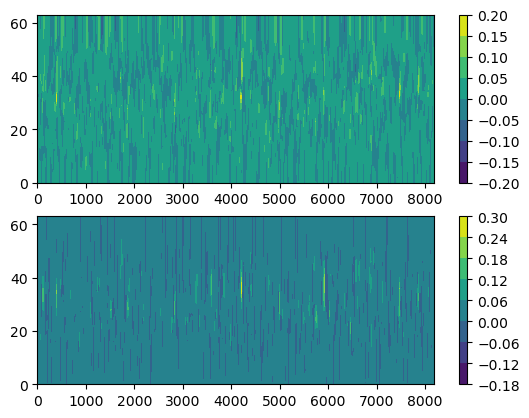

MRBC_2D_Ka_1.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_3.2e+01_tp_5.0e+00


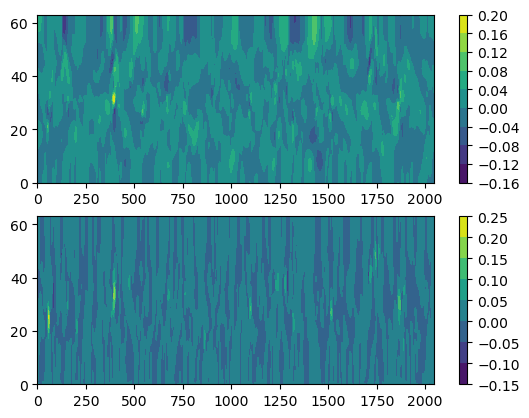

MRBC_2D_Ka_2.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_1.3e+02_tp_5.0e+00


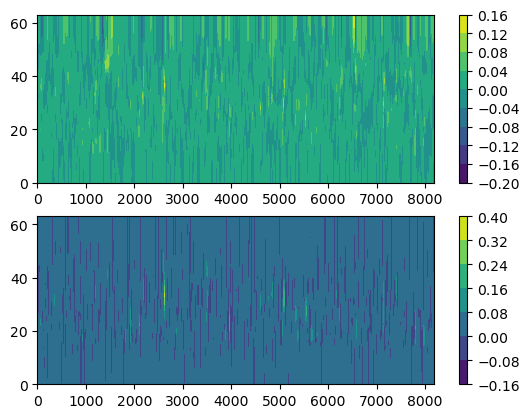

MRBC_2D_Ka_2.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_3.2e+01_tp_5.0e+00


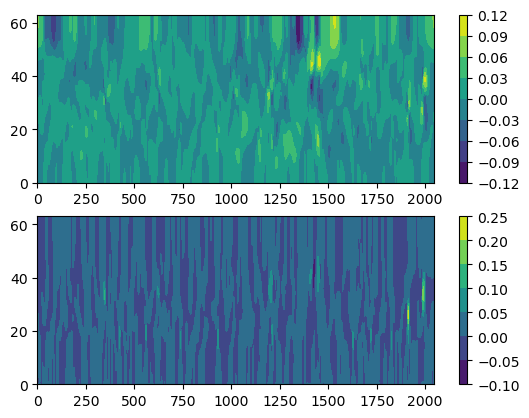

MRBC_2D_Ka_4.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_1.3e+02_tp_5.0e+00


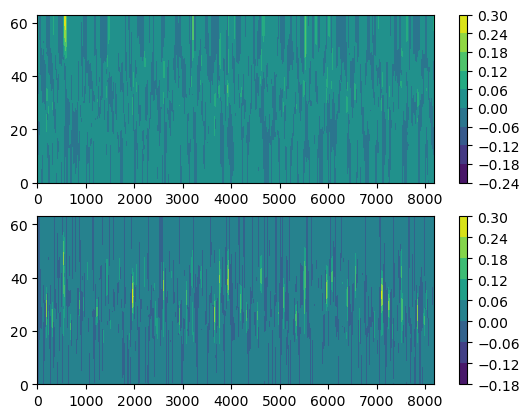

MRBC_2D_Ka_4.0e-04_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_3.2e+01_tp_5.0e+00


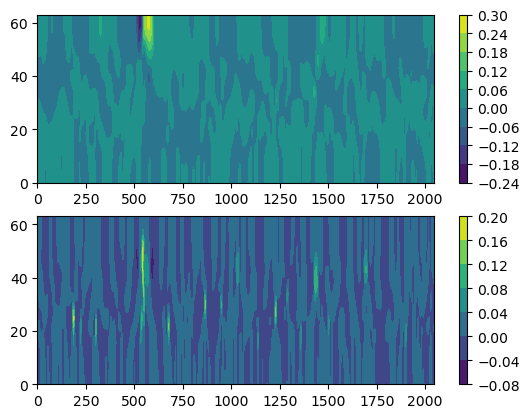

In [37]:
for exp in exp_list:
    filename = base_dir + exp + '/snapshots/snapshots_s2.h5'
    file = h5py.File(filename, mode='r')
    u = file['tasks']['velocity'][:,:,:,:]
    print(exp)
    plt.subplot(211)
    plt.contourf((u[0,0,:,:]).T)
    plt.colorbar()
    plt.subplot(212)
    plt.contourf(u[0,1,:,:].T)
    plt.colorbar()
    plt.show()
    file.close()

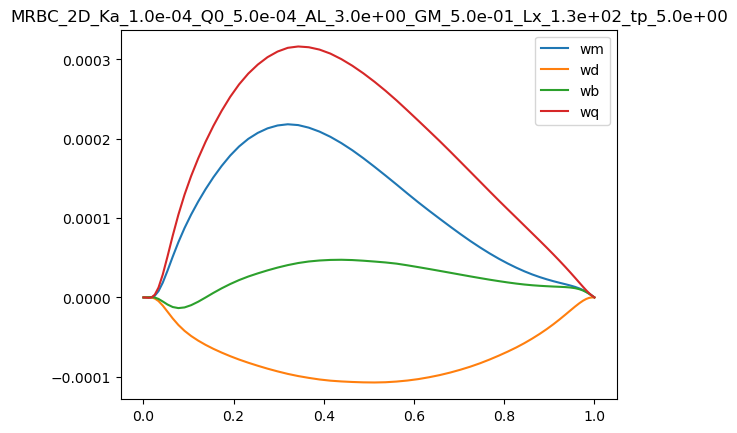

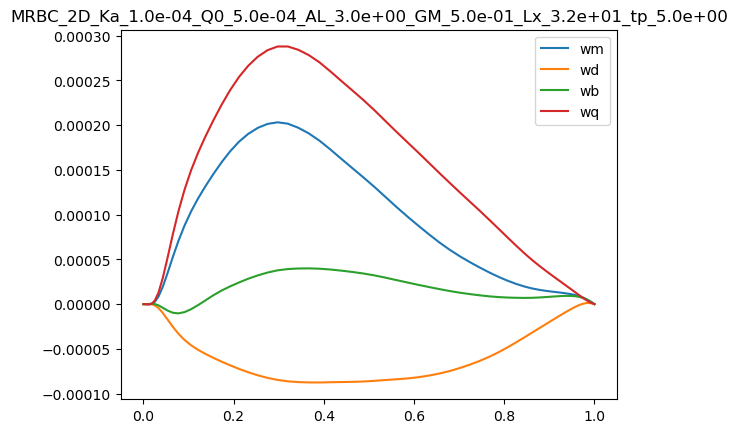

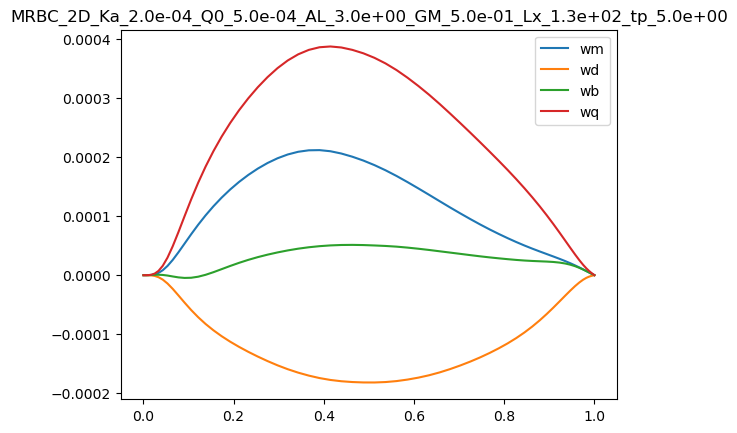

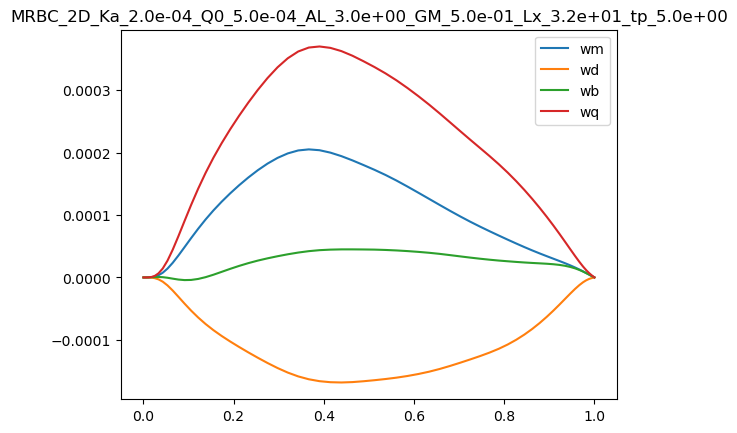

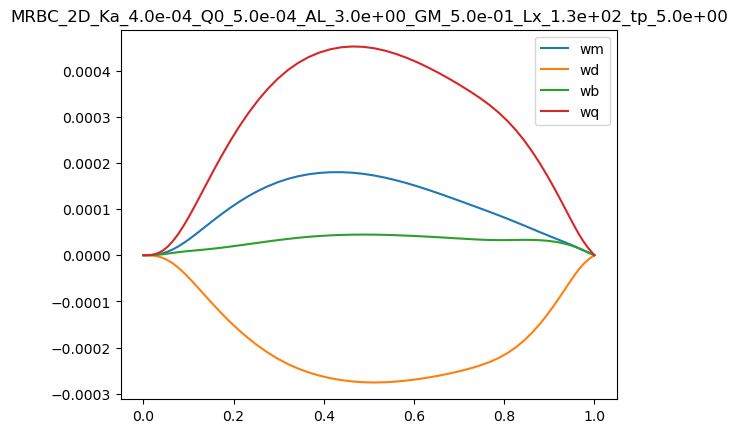

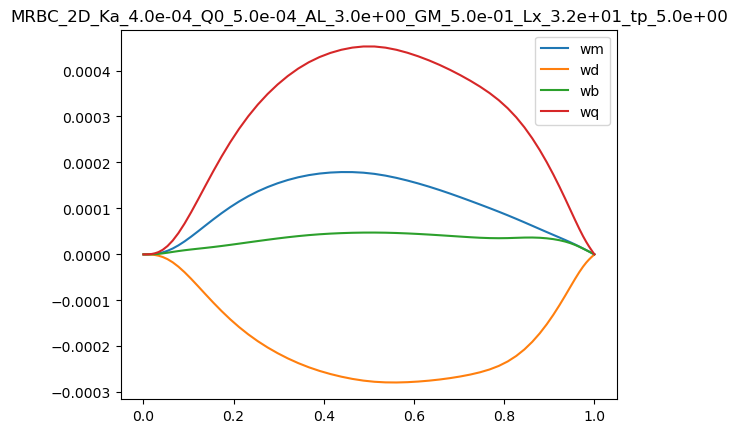

In [38]:
for exp in exp_list:
    filename = base_dir + exp + '/analysis/analysis_s15.h5'
    file = h5py.File(filename, mode='r')
    wm = file['tasks']['moist buoyancy flux'][:,0,:]
    Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
    time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
    wd = file['tasks']['dry buoyancy flux'][:,0,:]
    wb = file['tasks']['buoyancy flux'][:,0,:]
    #d = file['tasks']['dry buoyancy'][:,0,:]
    #m = file['tasks']['moist buoyancy'][:,0,:]
    #cld = file['tasks']['cloud buoyancy'][:,0,:]

    plt.plot(Z,np.mean(wm,0))
    plt.plot(Z,np.mean(wd,0))
    plt.plot(Z,np.mean(wb,0))
    plt.plot(Z,np.mean(wm - wd,0))
    plt.legend(('wm','wd','wb','wq'))
    plt.title(exp)
    plt.show()
    #plt.plot(Z,np.mean(m,0))
    #plt.plot(Z,np.mean(d,0))
    #plt.plot(Z,np.mean(cld,0))
    #plt.plot(Z,np.mean(m - d,0))
    #plt.legend(('m','d','cld','q'))
    #plt.title(exp)
    #plt.show()
    file.close()

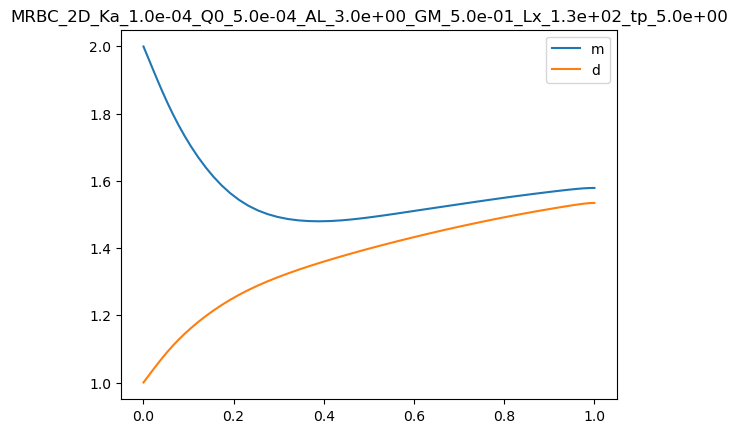

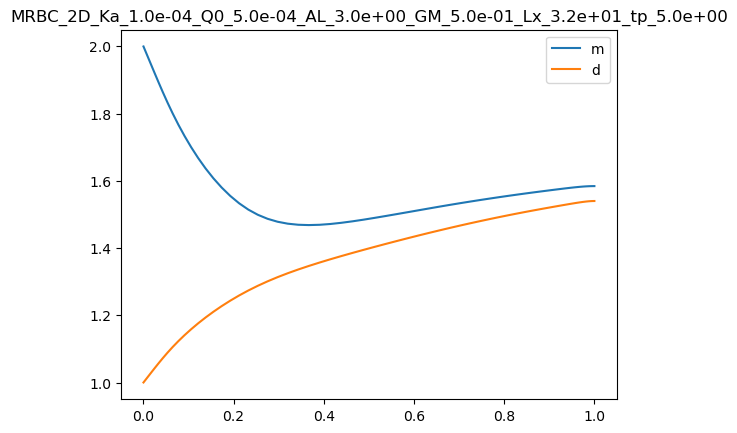

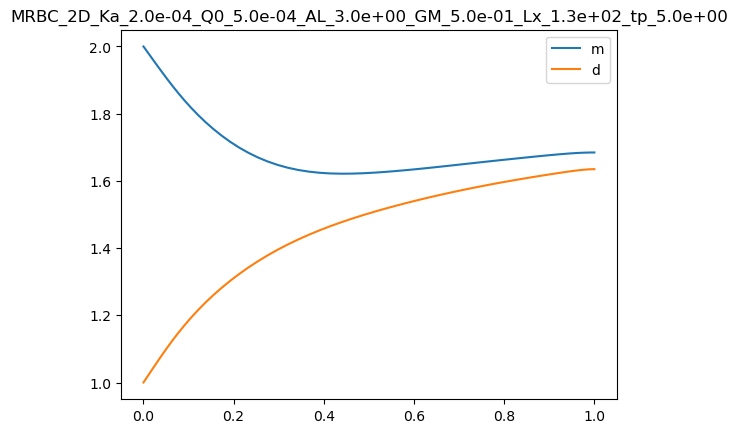

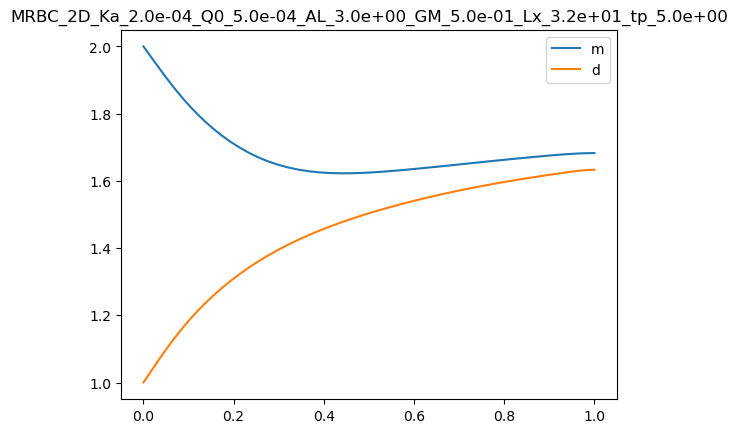

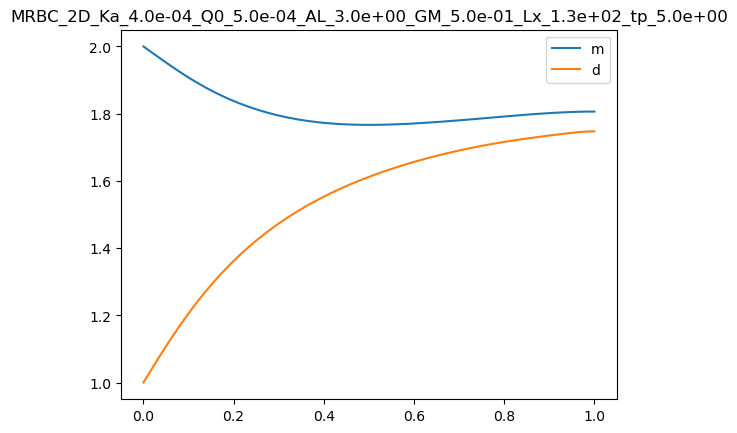

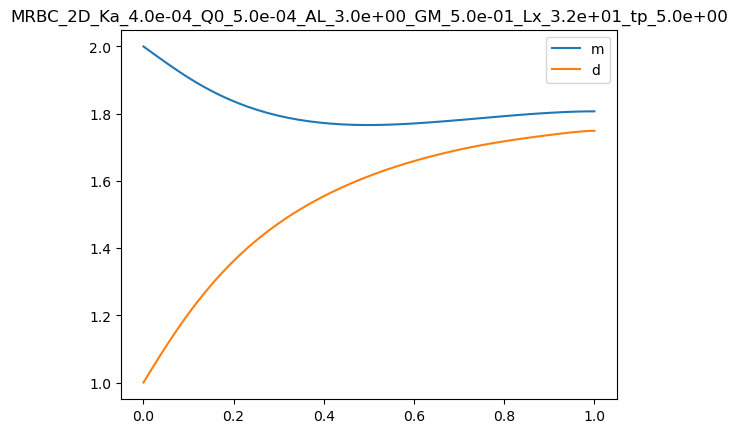

In [39]:
for exp in exp_list:
    filename = base_dir + exp + '/analysis/analysis_s10.h5'
    file = h5py.File(filename, mode='r')
    m = file['tasks']['zav moist buoyancy'][:,0,:]
    Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
    time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
    d = file['tasks']['zav dry buoyancy'][:,0,:]
    #d = file['tasks']['dry buoyancy'][:,0,:]
    #m = file['tasks']['moist buoyancy'][:,0,:]
    #cld = file['tasks']['cloud buoyancy'][:,0,:]

    plt.plot(Z,np.mean(m,0))
    plt.plot(Z,np.mean(d,0))
    plt.legend(('m','d'))
    plt.title(exp)
    plt.show()
    #plt.plot(Z,np.mean(m,0))
    #plt.plot(Z,np.mean(d,0))
    #plt.plot(Z,np.mean(cld,0))
    #plt.plot(Z,np.mean(m - d,0))
    #plt.legend(('m','d','cld','q'))
    #plt.title(exp)
    #plt.show()
    file.close()

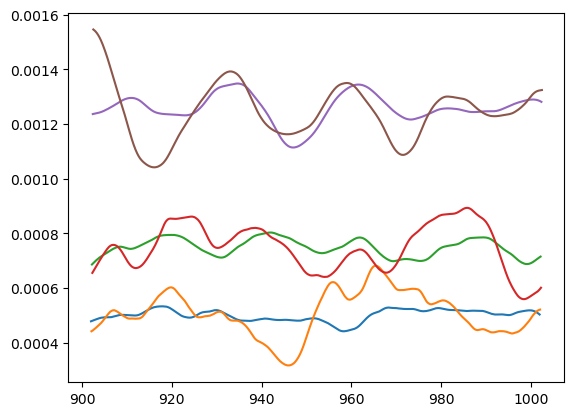

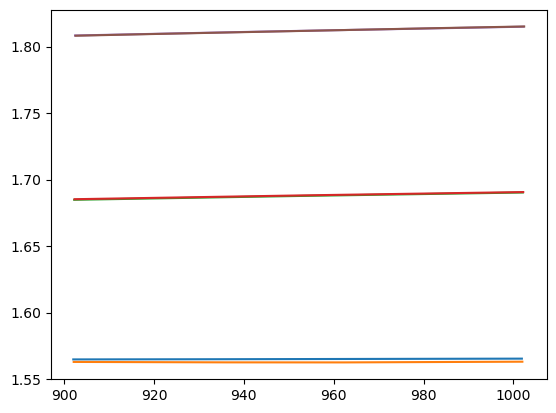

In [40]:
for exp in exp_list:
    filename = base_dir + exp + '/analysis/analysis_s10.h5'
    file = h5py.File(filename, mode='r')
    Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
    time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
    prec = file['tasks']['precipitation'][:,:,0]
    #d = file['tasks']['dry buoyancy'][:,0,:]
    #m = file['tasks']['moist buoyancy'][:,0,:]
    #cld = file['tasks']['cloud buoyancy'][:,0,:]

    plt.plot(time,np.mean(prec,1))
    file.close()
plt.show()
for exp in exp_list:
    filename = base_dir + exp + '/analysis/analysis_s10.h5'
    file = h5py.File(filename, mode='r')
    Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
    time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
    Mav = file['tasks']['integrated moist buoyancy'][:,:,0]
    #d = file['tasks']['dry buoyancy'][:,0,:]
    #m = file['tasks']['moist buoyancy'][:,0,:]
    #cld = file['tasks']['cloud buoyancy'][:,0,:]

    plt.plot(time,np.mean(Mav,1))
    file.close()
plt.show()

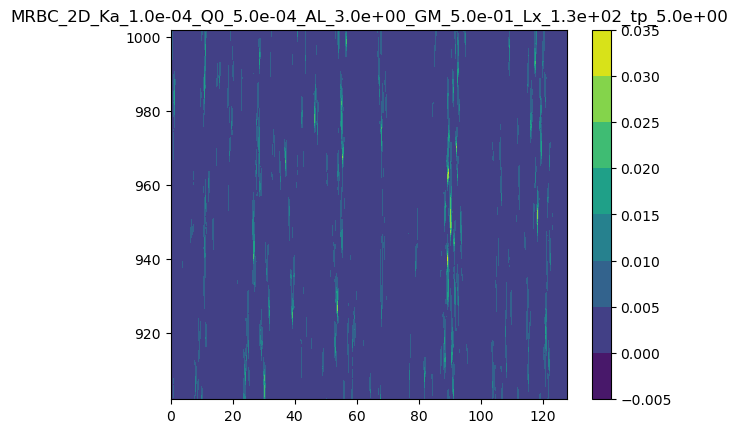

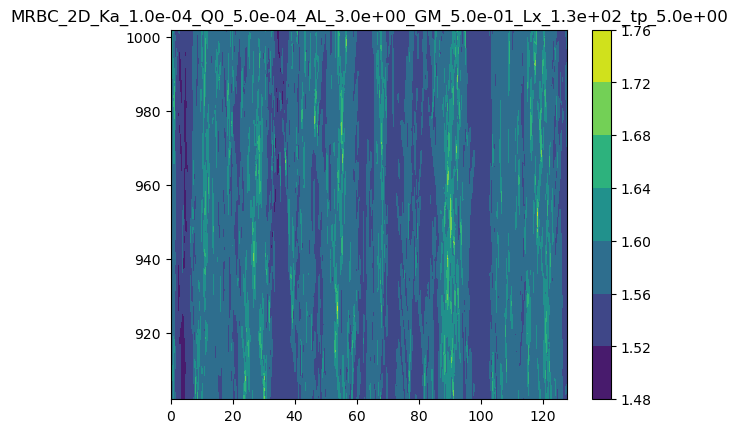

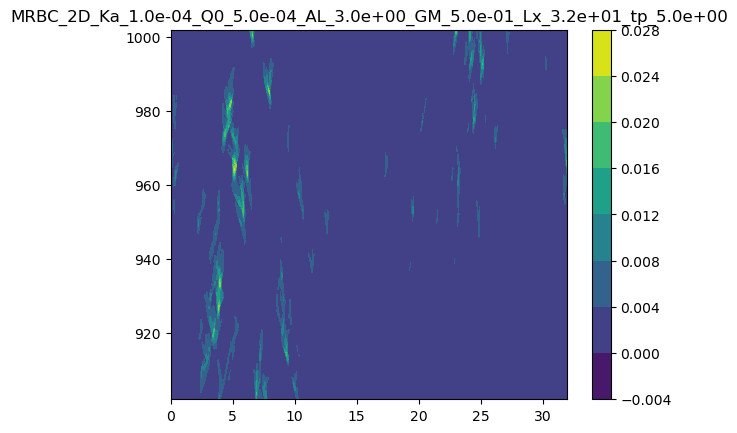

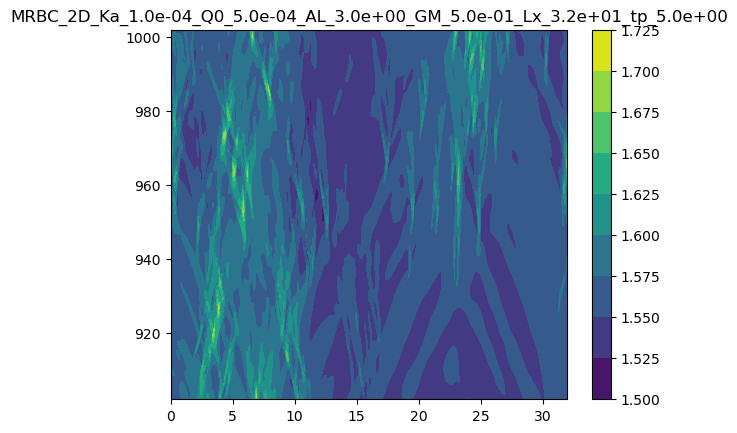

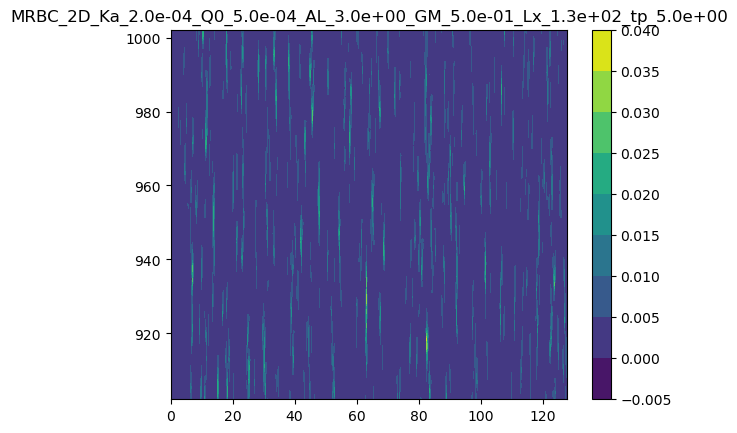

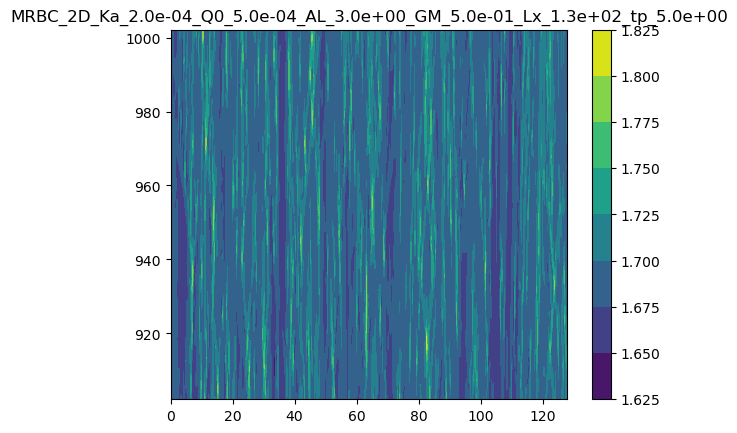

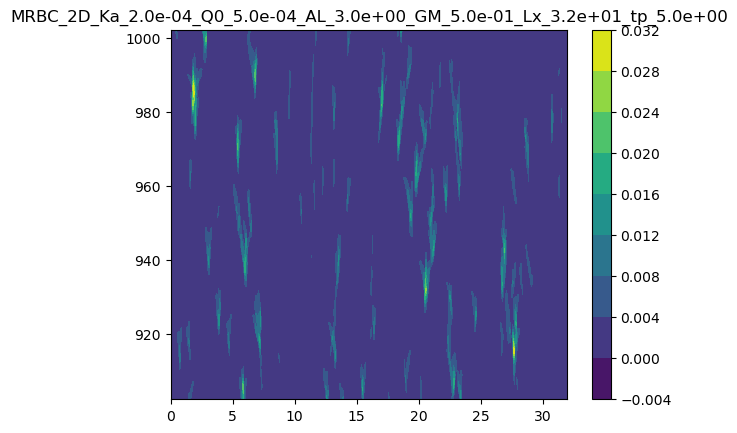

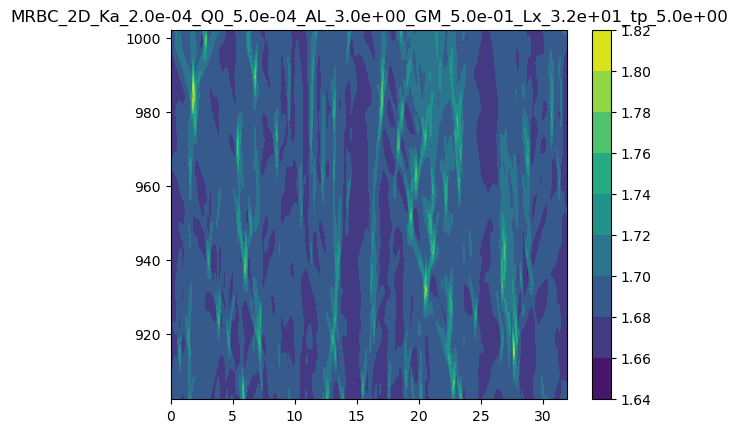

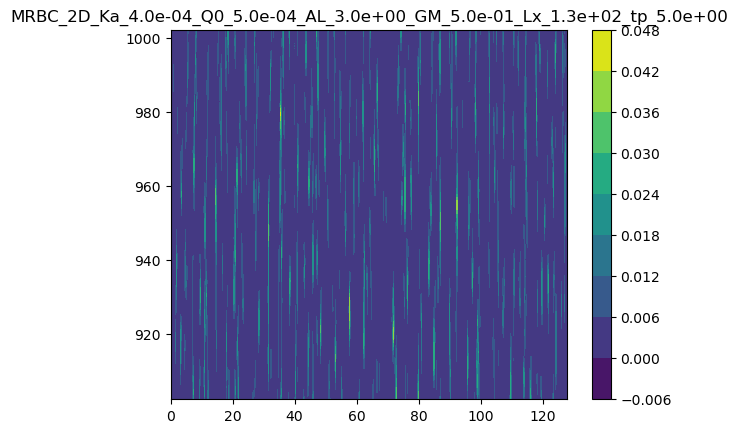

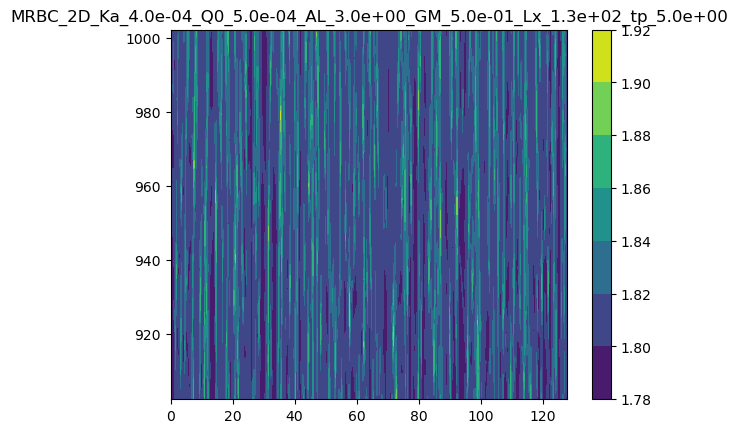

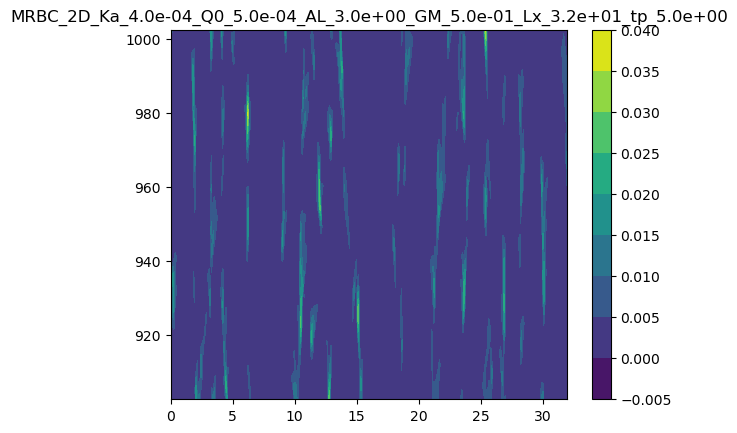

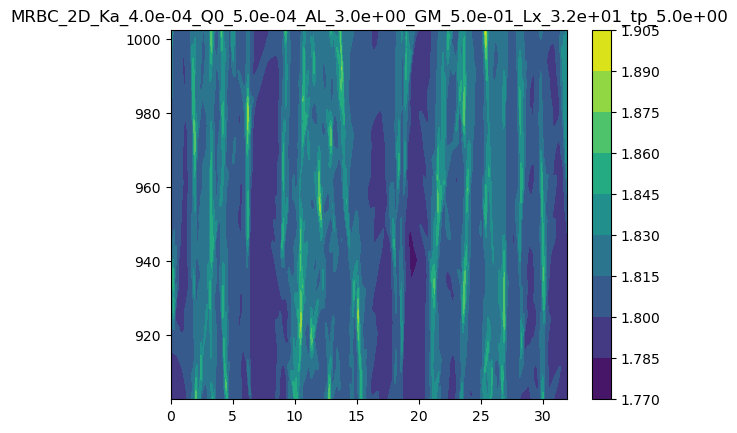

In [25]:
for exp in exp_list:
    filename = base_dir + exp + '/analysis/analysis_s10.h5'
    file = h5py.File(filename, mode='r')
    prec = file['tasks']['precipitation'][:,:,0]
    mav = file['tasks']['integrated moist buoyancy'][:,:,0]
    X = file['tasks']['precipitation'].dims[1]['x'][:]
    time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
    plt.contourf(X,time,prec)
    plt.colorbar()
    plt.title(exp)
    plt.show()
    plt.contourf(X,time,mav)
    plt.colorbar()
    plt.title(exp)
    plt.show()
    file.close()

In [23]:
print(prec.shape)

(1000, 2048)


In [4]:
exp = exp_list[-1]
#analysis_list =  sorted(glob.glob( exp + '/analysis/analysis_s?.h5',root_dir = base_dir)) \
#                    + sorted(glob.glob( exp + \
#                '/analysis/analysis_s??.h5',root_dir = base_dir))


analysis_list =  sorted(glob.glob( exp + '/analysis/analysis_s2?.h5',root_dir = base_dir))
print(analysis_list)

['MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s20.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s21.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s22.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s23.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s24.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s25.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s26.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s27.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s28.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analys

In [5]:
print(analysis_list[0])
file = h5py.File(base_dir + analysis_list[0], mode='r')
wm = file['tasks']['moist buoyancy flux'][:,0,:]
wd = file['tasks']['dry buoyancy flux'][:,0,:]
wb = file['tasks']['buoyancy flux'][:,0,:]
cld = file['tasks']['zav cloud buoyancy'][:,0,:]
d = file['tasks']['zav dry buoyancy'][:,0,:]
m = file['tasks']['zav moist buoyancy'][:,0,:]
prec = file['tasks']['precipitation'][:,:,0]
Mav = file['tasks']['integrated moist buoyancy'][:,:,0]
Dav = file['tasks']['integrated dry buoyancy'][:,:,0]
SDav = file['tasks']['surface flux of dry buoyancy'][:,:,0]
SMav = file['tasks']['surface flux of moist buoyancy'][:,:,0]
FMav = file['tasks']['zonal transport of moist buoyancy'][:,:,0]
FDav = file['tasks']['zonal transport of dry buoyancy'][:,:,0]

X = file['tasks']['precipitation'].dims[1]['x'][:]
Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
for analysis in analysis_list[1:]:
    print(analysis)
    file = h5py.File(base_dir + analysis, mode='r')
    wm = np.append(wm,file['tasks']['moist buoyancy flux'][:,0,:],axis = 0)
    wd = np.append(wd,file['tasks']['dry buoyancy flux'][:,0,:],axis = 0)
    wb = np.append(wb,file['tasks']['buoyancy flux'][:,0,:],axis = 0)
    cld = np.append(cld,file['tasks']['zav cloud buoyancy'][:,0,:],axis = 0)
    d = np.append(d,file['tasks']['zav dry buoyancy'][:,0,:],axis = 0)
    m = np.append(m,file['tasks']['zav moist buoyancy'][:,0,:],axis = 0)
    prec = np.append(prec,file['tasks']['precipitation'][:,:,0],axis = 0)
    Mav = np.append(Mav,file['tasks']['integrated moist buoyancy'][:,:,0],axis = 0)
    Dav = np.append(Dav,file['tasks']['integrated dry buoyancy'][:,:,0],axis = 0)
    SMav = np.append(SMav,file['tasks']['surface flux of moist buoyancy'][:,:,0],axis = 0)
    SDav = np.append(SDav,file['tasks']['surface flux of dry buoyancy'][:,:,0],axis = 0)
    FMav = np.append(FMav,file['tasks']['zonal transport of moist buoyancy'][:,:,0],axis = 0)
    FDav = np.append(FDav,file['tasks']['zonal transport of dry buoyancy'][:,:,0],axis = 0)

    time = np.append(time,file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:],axis = 0)


MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s20.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s21.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s22.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s23.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s24.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s25.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s26.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s27.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s28.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/analysis/analysis_s29.h5


In [1]:
print(Mav.shape)
print(time.shape)

NameError: name 'Mav' is not defined

In [ ]:
plt.contourf(X[:],time[:],prec[:,:])
plt.colorbar()
plt.show()
plt.contourf(X,time[-1000:],Mav[-1000:,:]-np.mean(Mav[-1000:,:],1,keepdims = True))
plt.colorbar()
plt.show()
plt.contourf(X,time[-1000:],-SMav[-1000:,:])
plt.colorbar()
plt.show()
plt.contourf(X,time[-1000:],FMav[-1000:,:])
plt.colorbar()
plt.show()

In [1]:
kappa = 1e-3
plt.contourf(time[:],Z,wd[:,:].T)
plt.colorbar()
plt.show()
plt.plot(time[:],wm[:,5])
plt.plot(time[:],wd[:,5])

plt.show()
plt.plot(time,kappa * (2.0 - m[:,1])/Z[1])
plt.plot(time,kappa * (1.0 - d[:,1])/Z[1])
plt.plot(time,kappa * (1.0 - m[:,1] + d[:,1])/Z[1])
plt.plot(time,np.mean(SMav,1))
plt.plot(time,np.mean(SDav,1))


plt.show()
plt.plot(time, (2.0 - m[:,1])/(2.0 - m[:,-1]) * (Z[-1]/Z[1]))
plt.plot(time, (1.0 - d[:,1])/(1.0 - d[:,-1]) * (Z[-1]/Z[1]))
plt.plot(time, (1.0 - m[:,1] + d[:,1] )/(1.0 - m[:,-1] + d[:,-1]) * (Z[-1]/Z[1]))

plt.show()
plt.plot(time[1000:],np.mean(prec[1000:,:],1))
plt.show()
plt.plot(time[000:],np.mean(Mav[000:,:],1))
plt.plot(time[000:],np.mean(Dav[00:,:],1))
plt.show()
plt.plot

NameError: name 'plt' is not defined

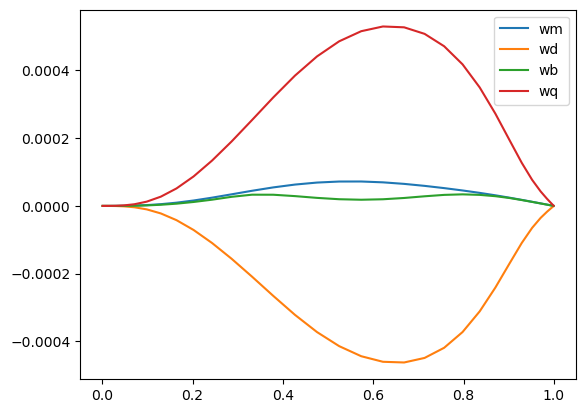

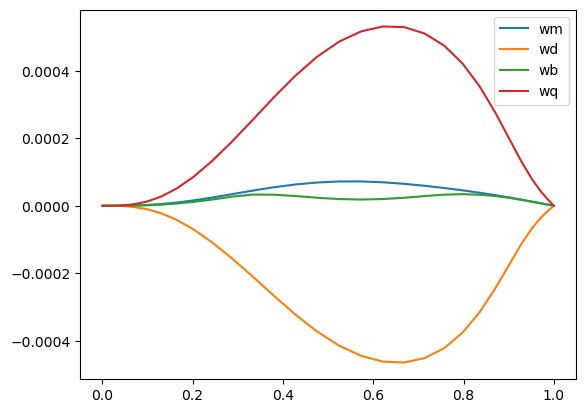

In [6]:
plt.plot(Z,np.mean(wm,0))
plt.plot(Z,np.mean(wd,0))
plt.plot(Z,np.mean(wb,0))
plt.plot(Z,np.mean(wm - wd,0))
plt.legend(('wm','wd','wb','wq'))
plt.show()
plt.plot(Z,np.mean(wm[-2000:,:],0))
plt.plot(Z,np.mean(wd[-2000:,:],0))
plt.plot(Z,np.mean(wb[-2000:,:],0))
plt.plot(Z,np.mean((wm - wd)[-2000:,:],0))
plt.legend(('wm','wd','wb','wq'))
plt.show()

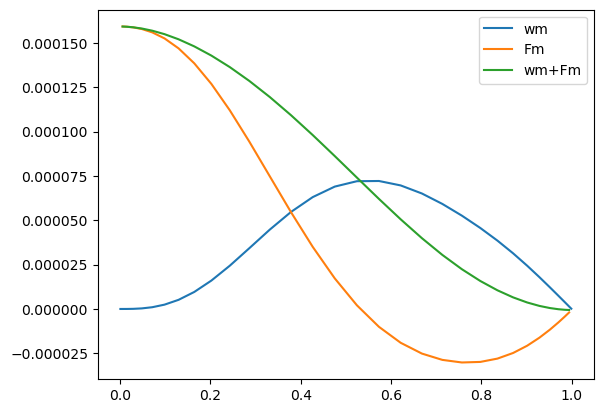

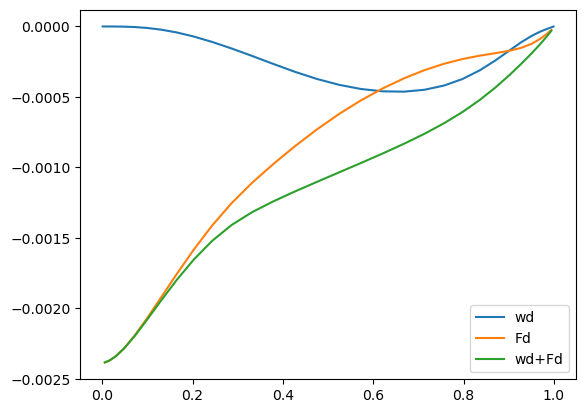

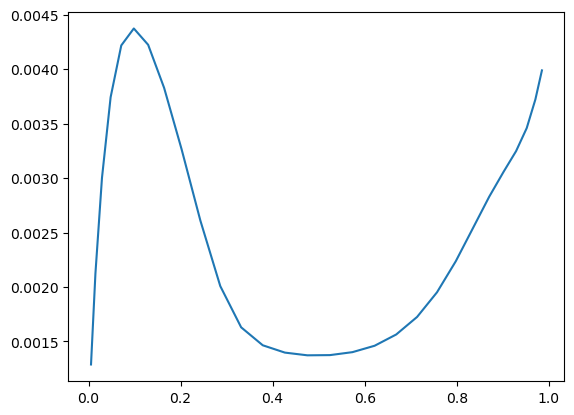

In [9]:
kappa = 0.001
FM = kappa * (m[:,2:]- m[:,:-2])/(Z[2:]-Z[:-2])
FD = kappa * (d[:,2:]- d[:,:-2])/(Z[2:]-Z[:-2])

plt.plot(Z,np.mean(wm,0))
plt.plot(Z[1:-1],np.mean(-FM,0))
plt.plot(Z[1:-1],np.mean(wm[-2000:,1:-1]-FM[-2000:,:],0))

plt.legend(('wm','Fm','wm+Fm'))
plt.show()

plt.plot(Z,np.mean(wd,0))
plt.plot(Z[1:-1],np.mean(-FD,0))
plt.plot(Z[1:-1],np.mean(wd[-2000:,1:-1]-FD[-2000:,:],0))

plt.legend(('wd','Fd','wd+Fd'))
plt.show()
plt.plot((Z[1:-2]),np.diff(np.mean(wd[-2000:,1:-1]-FD[-2000:,:],0))/np.diff(Z[1:-1]))


In [10]:
alpha = 3.0
gamma = 0.5
M0 = 2.0
Dsat =  (1 - gamma * np.exp( -alpha * Z)) *M0 
dsat = (1 - gamma * np.exp( -alpha * Z))* m
msat = d / (1 - gamma * np.exp( -alpha * Z))

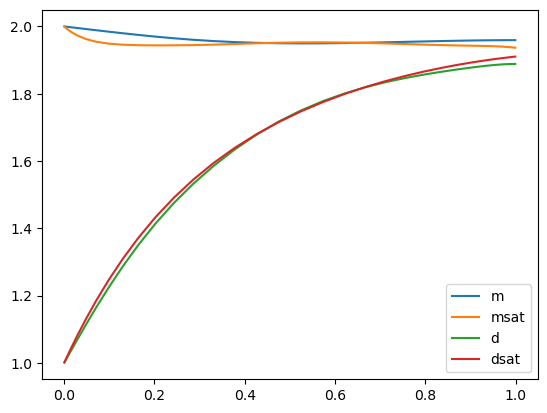

/ext3/miniconda3/envs/dedalus3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/ext3/miniconda3/envs/dedalus3/lib/python3.11/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


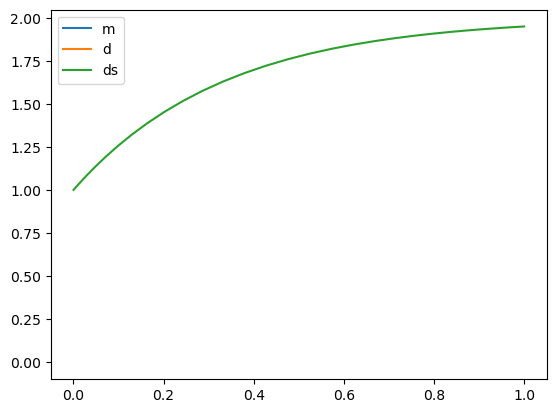

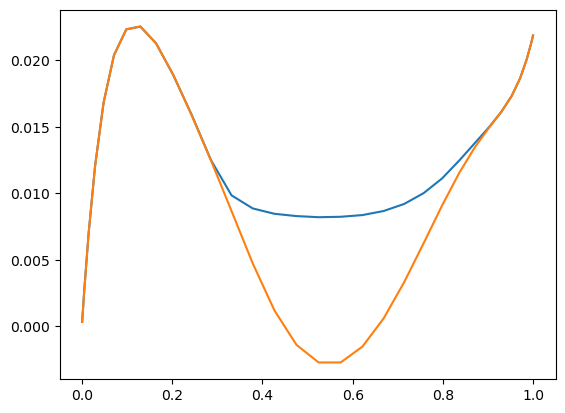

In [11]:
plt.plot(Z,np.mean(m,0))
plt.plot(Z,np.mean(msat,0))
plt.plot(Z,np.mean(d,0))
plt.plot(Z,np.mean(dsat,0))

#plt.plot(Z,Dsat,0)
#plt.plot(Z, (1 - gamma * np.exp( -alpha * Z)) *np.mean(m[:,-1],0)) 

#plt.plot(Z,np.mean(cld,0))
plt.legend(('m','msat','d','dsat'))
plt.show()
plt.plot(Z,np.mean(m[5000:7000,:],0))
plt.plot(Z,np.mean(d[5000:7000:,:],0))
plt.plot(Z,Dsat,0)

#plt.plot(Z,np.mean(cld[2000:3000,:],0))
plt.legend(('m','d','ds'))
plt.show()

plt.plot(Z,np.mean(cld,0))
plt.plot(Z,np.mean((1 - gamma * np.exp( -alpha * Z)) * (m-msat),0))


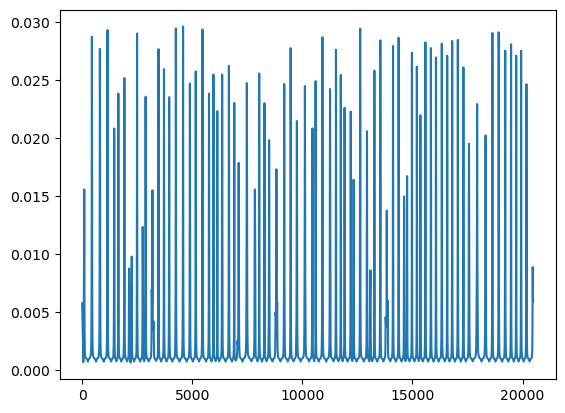

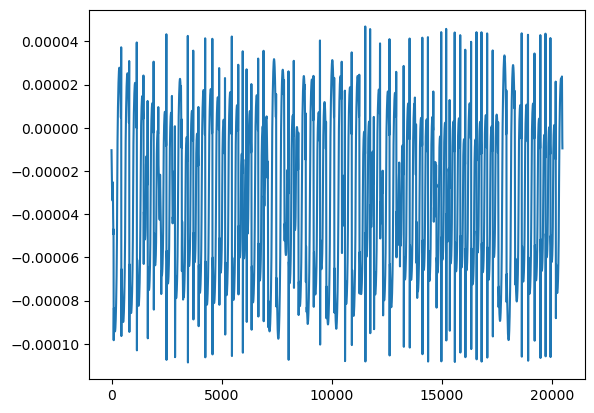

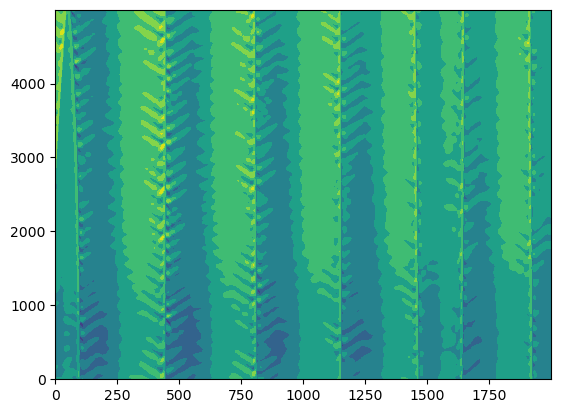

In [18]:
plt.plot(np.mean(prec,0))
plt.show()
plt.plot(np.mean(FMav,0))
plt.show()
plt.contourf(FMav[-5000:,:2000])

In [ ]:
print(np.mean(prec))
print(np.mean(prec[-10000:,:]))
print(kappa * (2 - np.mean(m[:,1],0)) / Z[1])
print(kappa * (2 - np.mean(m[-1000:,1],0)) / Z[1])
print(kappa * (1.0 - np.mean(d[:,1],0)) / Z[1])
print(kappa * (1.0 - np.mean(d[-1000:,1],0)) / Z[1])


0.002* 2 / np.pi

In [6]:
exp = exp_list[0]
snap_list = sorted(glob.glob( exp + '/snapshots/snapshots_s2?.h5',root_dir = base_dir))
#snap_list = snap_list + sorted(glob.glob( exp + '/snapshots/snapshots_s??.h5',root_dir = base_dir))
print(snap_list)
print(len(snap_list))

['MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s20.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s21.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s22.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s23.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s24.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s25.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s26.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s27.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s28.h5', 'MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02

In [7]:
print(snap_list[0])
file = h5py.File(base_dir + snap_list[0], mode='r')
M=file['tasks']['moist buoyancy'][:,:,:]
D=file['tasks']['dry buoyancy'][:,:,:]

for snap in snap_list[1:]:
    print(snap)
    file = h5py.File(base_dir + snap, mode='r')
    M = np.append(M,file['tasks']['moist buoyancy'][:,:,:],axis = 0 )
    D = np.append(D,file['tasks']['dry buoyancy'][:,:,:],axis = 0 ) 
Z = file['tasks']['moist buoyancy'].dims[2]['z'][:]


MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s20.h5
MRBC_2D_Ka_1.0e-03_Q0_2.5e-04_AL_3.0e+00_GM_5.0e-01_Lx_6.4e+02_tp_5.0e+00/snapshots/snapshots_s21.h5


KeyboardInterrupt: 

In [39]:
Z = file['tasks']['moist buoyancy'].dims[2]['z'][:]
X = file['tasks']['moist buoyancy'].dims[1]['x'][:]


In [40]:
CLD = np.maximum(M - D + N2 * Z,0)


In [47]:
print(Z[16],Z[24],Z[32],Z[40],Z[48])

0.04044307415497117 0.08770534860748741 0.1508118752955136 0.22733750578897682 0.31434140302408126


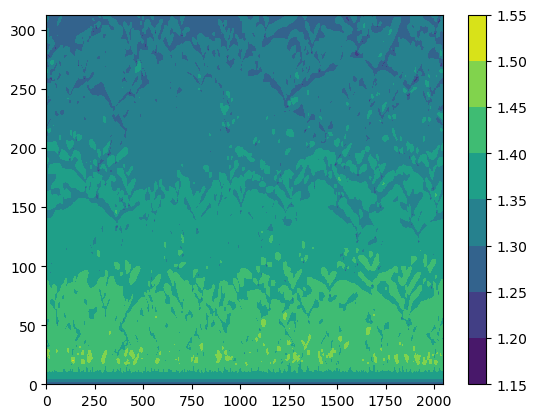

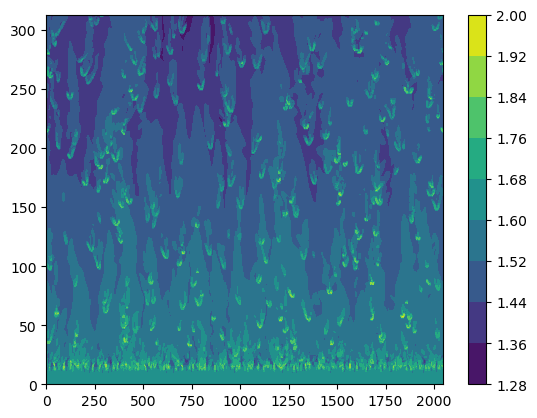

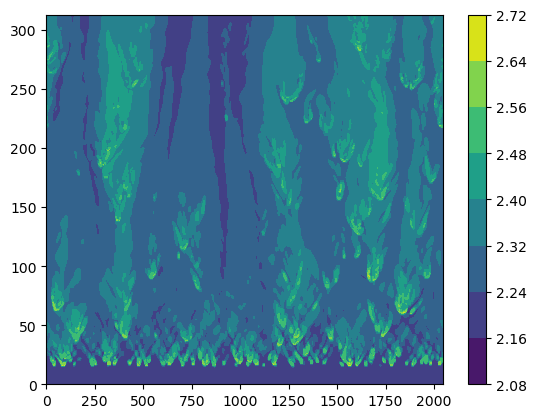

IndexError: index 64 is out of bounds for axis 2 with size 64

In [41]:
plt.contourf((D)[:,:,24])
plt.colorbar()
plt.show()
plt.contourf((M)[:,:,32])
plt.colorbar()
plt.show()
plt.contourf((D+CLD)[:,:,48])
plt.colorbar()
plt.show()
plt.contourf((CLD)[:,:,64]- 1.5 * N2 * Z[64])
plt.colorbar()
plt.show()
plt.contourf((np.mean(M,-1)))
plt.colorbar()
plt.show()
plt.contourf(np.mean((D+CLD),-1))
plt.colorbar()
plt.show()
plt.contourf(np.mean((CLD),-1))
plt.colorbar()
plt.show()

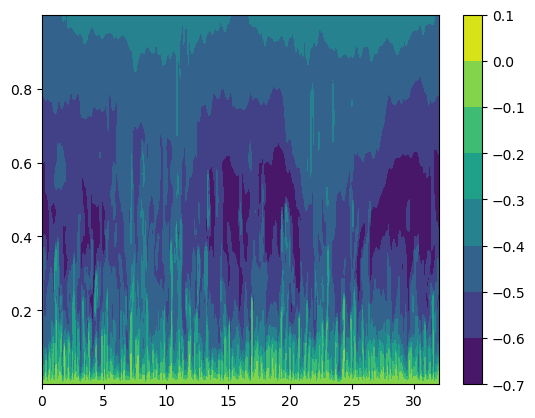

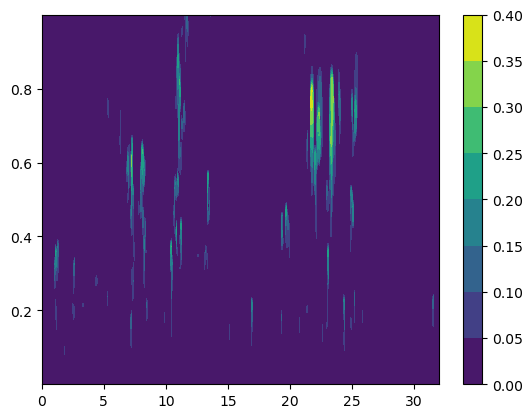

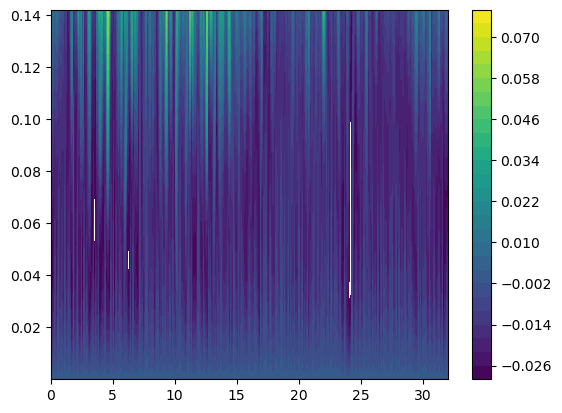

In [52]:
plt.contourf(X,Z,(M)[400,:,:].T)
plt.colorbar()
plt.show()
plt.contourf(X,Z,(CLD)[400,:,:].T)
plt.colorbar()
plt.show()
plt.contourf(X,Z[:32],((D)[400,:,:32] - 0 * Z[:32]).T,levels = np.arange(-0.030,0.08,0.004))
plt.colorbar()
plt.show()

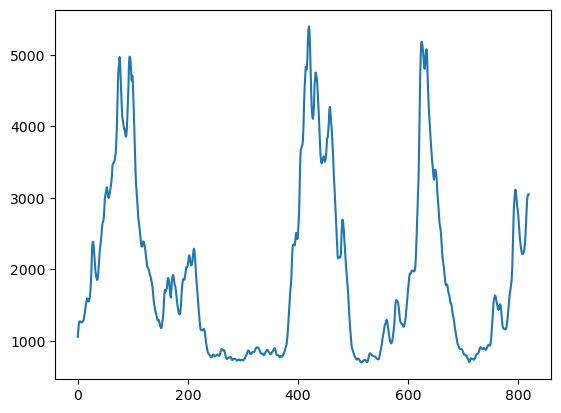

In [70]:
plt.plot(np.sum(CLD[:,90:,:],(1,2)))

In [16]:
# Plot settings

filename = base_dir + exp_list[0] + '/snapshots/snapshots_s1.h5'
print(filename)
# Create multifigure
file = h5py.File(filename, mode='r')
for name in file:
    for data in file[name]:
        print(name,data)

        filename = base_dir + exp_list[0] + '/analysis/analysis_s1.h5'
print(filename)
# Create multifigure
file = h5py.File(filename, mode='r')
for name in file:
    for data in file[name]:
        print(name,data)

/scratch/op13/dedalus/MRBC_MOD/MRBC_2D_Ka_1.0e-03_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_3.2e+01_tp_5.0e+00/snapshots/snapshots_s1.h5
scales constant
scales iteration
scales sim_time
scales timestep
scales wall_time
scales world_time
scales write_number
scales x_hash_a717d182989f1a5c0a25bd65a8eb8fc71fc8eede
scales z_hash_379a9dade55ae037045163625e8eb5bc152eeb8d
tasks cloud buoyancy
tasks dry buoyancy
tasks moist buoyancy
tasks velocity
/scratch/op13/dedalus/MRBC_MOD/MRBC_2D_Ka_1.0e-03_Q0_5.0e-04_AL_3.0e+00_GM_5.0e-01_Lx_3.2e+01_tp_5.0e+00/analysis/analysis_s1.h5
scales constant
scales iteration
scales sim_time
scales timestep
scales wall_time
scales world_time
scales write_number
scales x_hash_a717d182989f1a5c0a25bd65a8eb8fc71fc8eede
scales z_hash_379a9dade55ae037045163625e8eb5bc152eeb8d
tasks buoyancy flux
tasks dry buoyancy flux
tasks integrated KE
tasks integrated cloud buoyancy
tasks integrated dry buoyancy
tasks integrated moist buoyancy
tasks moist buoyancy flux
tasks precipitation


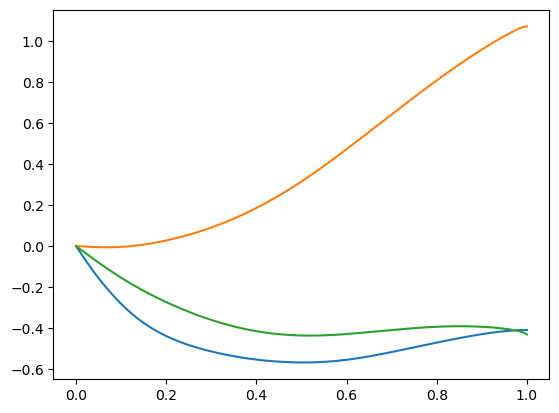

In [49]:

plt.plot(Z,np.mean(M[700:750,:,:],(0,1)))
plt.plot(Z,np.mean(D[700:750,:,:],(0,1)))
plt.plot(Z,np.mean((D)[700:750,:,:],(0,1))-1.5 * Z)


In [20]:
file = h5py.File(analysis_file, mode='r')
for name in file:
    for data in file[name]:
        print(name,data)
wm = file['tasks']['moist buoyancy flux'][:,0,:]
Z = file['tasks']['moist buoyancy flux'].dims[2]['z'][:]
time = file['tasks']['moist buoyancy flux'].dims[0]['sim_time'][:]
wd = file['tasks']['dry buoyancy flux'][:,0,:]
wb = file['tasks']['buoyancy flux'][:,0,:]


NameError: name 'analysis_file' is not defined

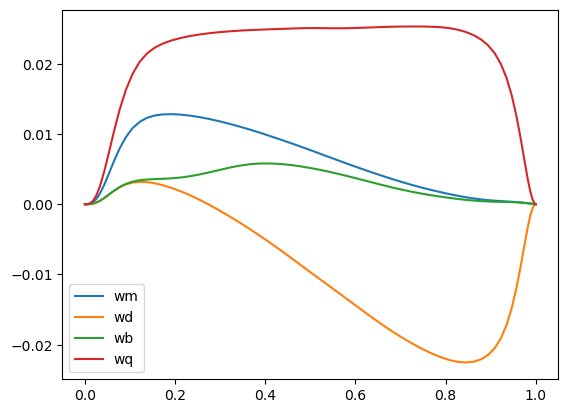

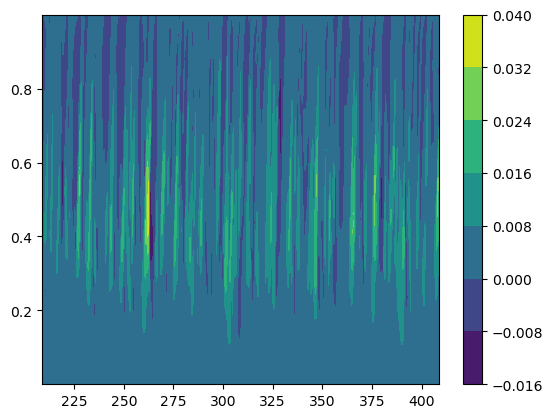

In [27]:
plt.plot(Z,np.mean(wm,0))
plt.plot(Z,np.mean(wd,0))
plt.plot(Z,np.mean(wb,0))
plt.plot(Z,np.mean(2 * wm - wd,0))
plt.legend(('wm','wd','wb','wq'))
plt.show()
plt.contourf(time[:],Z,wb[:,:].T)
plt.colorbar()
plt.show()

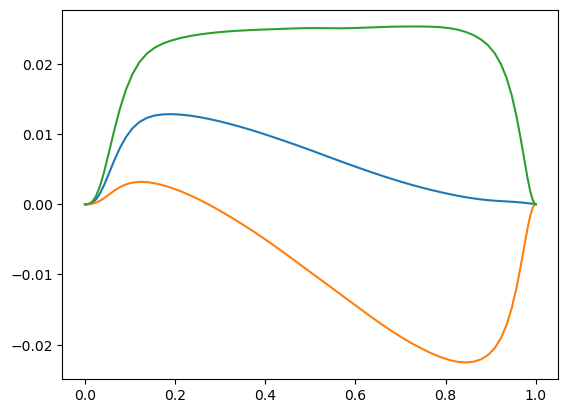

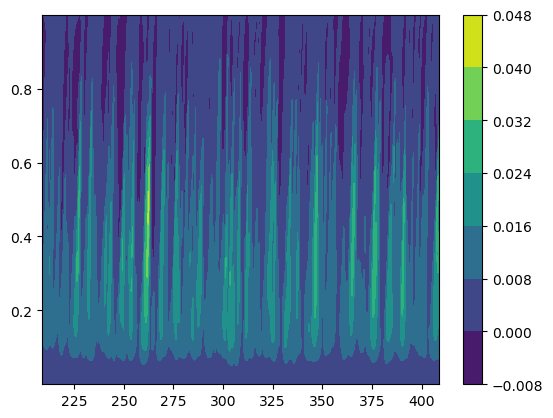

In [31]:
plt.plot(Z,np.mean(wm,0))
plt.plot(Z,np.mean(wd,0))
plt.plot(Z,np.mean(2 * wm - wd,0))
plt.show()
plt.contourf(time,Z,wm.T)
plt.colorbar()
plt.show()

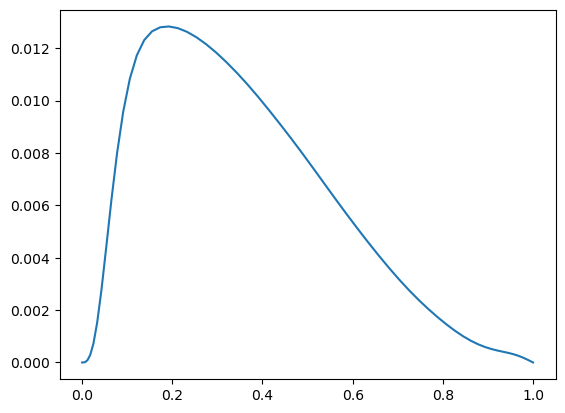

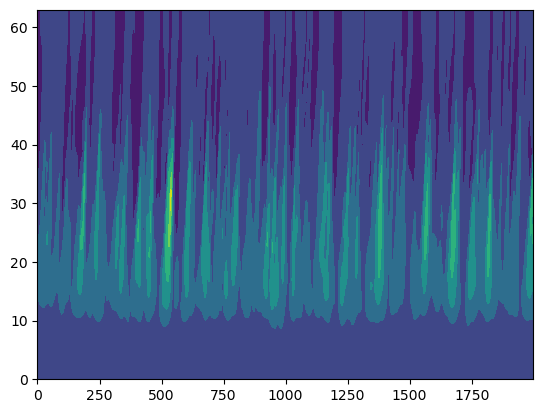

In [29]:
plt.plot(Z,np.mean(wm,0))
plt.show()
plt.contourf(wm.T)
plt.show()

In [83]:
for name in file['tasks']['moist buoyancy flux'].shape:
    print(name)

1445
1
64


In [81]:
print(M.dims[2]['z'][:])

[1.50590652e-04 1.35477166e-03 3.76023270e-03 7.36117881e-03
 1.21489350e-02 1.81119671e-02 2.52359097e-02 3.35036006e-02
 4.28951221e-02 5.33878494e-02 6.49565044e-02 7.75732174e-02
 9.12075934e-02 1.05826786e-01 1.21395577e-01 1.37876459e-01
 1.55229728e-01 1.73413579e-01 1.92384205e-01 2.12095904e-01
 2.32501190e-01 2.53550904e-01 2.75194335e-01 2.97379343e-01
 3.20052482e-01 3.43159130e-01 3.66643621e-01 3.90449380e-01
 4.14519056e-01 4.38794662e-01 4.63217718e-01 4.87729386e-01
 5.12270614e-01 5.36782282e-01 5.61205338e-01 5.85480944e-01
 6.09550620e-01 6.33356379e-01 6.56840870e-01 6.79947518e-01
 7.02620657e-01 7.24805665e-01 7.46449096e-01 7.67498810e-01
 7.87904096e-01 8.07615795e-01 8.26586421e-01 8.44770272e-01
 8.62123541e-01 8.78604423e-01 8.94173214e-01 9.08792407e-01
 9.22426783e-01 9.35043496e-01 9.46612151e-01 9.57104878e-01
 9.66496399e-01 9.74764090e-01 9.81888033e-01 9.87851065e-01
 9.92638821e-01 9.96239767e-01 9.98645228e-01 9.99849409e-01]


In [71]:
file['scales']['sim_time'][:]

array([112.5 , 112.75, 113.  , 113.25, 113.5 , 113.75, 114.  , 114.25,
       114.5 , 114.75, 115.  , 115.25, 115.5 , 115.75, 116.  , 116.25,
       116.5 , 116.75, 117.  , 117.25, 117.5 , 117.75, 118.  , 118.25,
       118.5 , 118.75, 119.  , 119.25, 119.5 , 119.75, 120.  , 120.25,
       120.5 , 120.75, 121.  , 121.25, 121.5 , 121.75, 122.  , 122.25,
       122.5 , 122.75, 123.  , 123.25, 123.5 , 123.75, 124.  , 124.25,
       124.5 , 124.75])

In [118]:
M = file['tasks']['dry buoyancy']

In [119]:
print(M)

<HDF5 dataset "dry buoyancy": shape (31, 1024, 64), type "<f8">


In [91]:
np.sqrt(1/2e6)*2.3333333


0.0016499157991983848

In [26]:
wb.shape

(1000, 1, 32)